In [35]:
## Importing all important libraries and function for ignoring warnings.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
## Creating DataFrame using Loan Data.
loan_df = pd.read_csv("loan.csv", low_memory=False)

## CLEANING DATA

In [37]:
# Checking outline of data.
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [38]:
# Display the number of Rows and Columns in the Loan Data Frame.
loan_df.shape

(39717, 111)

In [39]:
# Checking for null values in each column of the Loan Data Frame
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# Display the initial information of the Loan Data Frame
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [40]:
# Set display options for visibility of complete rpw and colums.
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 150)

In [41]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [44]:
# Removing columns Which are not required in our analysis.
columns_to_remove_initial = [
    'id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 
    'title', 'zip_code', 'inq_last_6mths', 'mths_since_last_record', 
    'pub_rec', 'open_acc', 'mths_since_last_delinq', 
    'total_il_high_credit_limit', 'total_bc_limit', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 
    'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 
    'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
    'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
    'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
    'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 
    'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 
    'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
    'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
    'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
    'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
    'total_il_high_credit_limit'
]
loan_df = loan_df.drop(columns=[col for col in columns_to_remove_initial if col in loan_df.columns])

In [45]:
# Removing Columns with more than 80% of the missing values.
cleaned_data = loan_df.drop(loan_df.columns[loan_df.apply(lambda col: col.isnull().sum() / len(loan_df) > 0.80)], axis=1)

In [46]:
# Displaying the missing value data and dimensions of data frame.
print(loan_df.isnull().sum())
print(loan_df.shape)

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int       

In [47]:
# Displaying the cleaned data's missing values and shape
print(cleaned_data.isnull().sum())
print(cleaned_data.shape)

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int       

In [48]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [49]:
# Operatins to convert some object data to float and int for analysis.
cleaned_data['int_rate'] = cleaned_data['int_rate'].str.rstrip('%').astype('float')
cleaned_data['term'] = cleaned_data['term'].str.extract('(\d+)').astype('int')
cleaned_data['revol_util'] = cleaned_data['revol_util'].str.rstrip('%').astype('float')

In [50]:
# Converting required date columns to datetime format
date_columns = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    cleaned_data[col] = pd.to_datetime(cleaned_data[col], format='%b-%y', errors='coerce')

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   39717 non-null  int64         
 1   funded_amnt                 39717 non-null  int64         
 2   funded_amnt_inv             39717 non-null  float64       
 3   term                        39717 non-null  int32         
 4   int_rate                    39717 non-null  float64       
 5   installment                 39717 non-null  float64       
 6   grade                       39717 non-null  object        
 7   sub_grade                   39717 non-null  object        
 8   emp_length                  38642 non-null  object        
 9   home_ownership              39717 non-null  object        
 10  annual_inc                  39717 non-null  float64       
 11  verification_status         39717 non-null  object    

In [51]:
# For the remaining missing values, fill numeric columns with median and categorical columns with mode
for col in cleaned_data.columns:
    if cleaned_data[col].dtype == 'object':
        cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)
    else:
        cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)


In [52]:
# Display the cleaned data's missing values and shape
print(cleaned_data.isnull().sum())
print(cleaned_data.shape)

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [34]:
# Removing duplicate rows if any
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.shape

(39717, 43)

In [53]:
# Display the first few rows of the fully cleaned data
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,Jan-96,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [54]:
## Removing additional not required columns which are not required for analysis.

df2 = cleaned_data.drop(['earliest_cr_line', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv','total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med', 'policy_code',
'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt', 'tax_liens',], axis = 1)

In [55]:
#Dimension of data after removing all the columns which are not required.
df2.shape

(39717, 23)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [26]:
df2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,2010-11-03 23:26:45.166553344,13.315130,0.146512,13382.528086,48.832741,22.088828,0.042501
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,2010-05-01 00:00:00,8.170000,0.000000,3703.000000,25.500000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,2011-02-01 00:00:00,13.400000,0.000000,8850.000000,49.300000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,2011-08-01 00:00:00,18.600000,0.000000,17058.000000,72.300000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,149588.000000,99.900000,90.000000,2.000000
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,NaN,6.678594,0.491812,15885.016641,28.314798,11.401709,0.202603


## SANITY CHECK ON DATA

Checking if there are any abnormal values in columns or if any parameter is not correct in dataset.

In [57]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,INDIVIDUAL,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,INDIVIDUAL,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,INDIVIDUAL,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,INDIVIDUAL,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,INDIVIDUAL,0.0


In [31]:
# Checking if there are any abnormal/ unnecessary values in categorical variables before performing analysis.
#This will avoid errors in analysis.

In [ ]:
## Checking categorical variable.

In [32]:
df2.term.value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [33]:
df2.grade.value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [34]:
df2.sub_grade.value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [35]:
df2.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [36]:
print(df2.home_ownership.value_counts())
print()
print(df2.verification_status.value_counts())
print()
print(df2.loan_status.value_counts())
print()
print(df2.purpose.value_counts())
print()
print(df2.addr_state.value_counts())

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     6

In [56]:
## Removing some categories where we have really few values compared to total population.

df2 = df2[~df2.addr_state.isin(['MT','WY','AK','SD','VT','MS','TN','IN','ID','IA','NE','ME'])]
df2 = df2[~df2.home_ownership.isin(['NONE','Other'])]

In [58]:
df2.application_type.value_counts()

application_type
INDIVIDUAL    39284
Name: count, dtype: int64

In [59]:
## Application type variable only have one value throughout hence removing this column.
df2 = df2.drop(['application_type'],axis=1)

In [61]:
#Validating if column is dropped.
df2.shape

(39284, 22)

In [ ]:
## Checking Factual variables.

In [66]:
df2.annual_inc.describe().apply(lambda x: format(x, 'f'))

count     38577.000000
mean      64457.316978
std       32918.984359
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      199992.000000
Name: annual_inc, dtype: object

<Axes: >

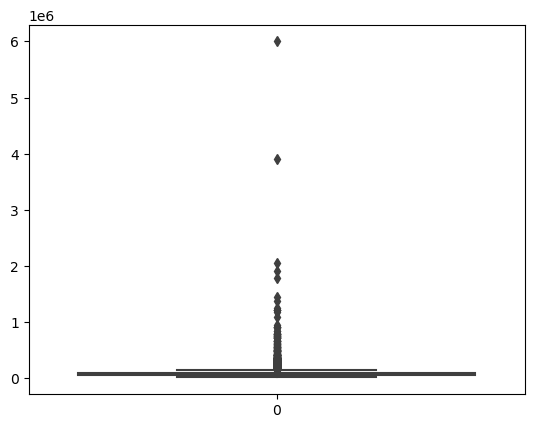

In [63]:
sns.boxplot(df2.annual_inc)

In [64]:
## We can see annual income column have huge outliers, median salary is ~ 60000, but we have few instances where salary exceeds 1000000.
## Removing all the rows above annual salary of 200000.
df2 = df2[~(df2.annual_inc >= 200000)]

In [65]:
## Checking if outliers are removed:-
df2[(df2.annual_inc >= 200000)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


In [41]:
print(df2.funded_amnt.describe())
print()
print(df2.funded_amnt_inv.describe())
print()
print(df2.loan_amnt.describe())

count    38577.000000
mean     10818.267361
std       7070.438699
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

count    38577.000000
mean     10281.130693
std       7006.661377
min          0.000000
25%       5000.000000
50%       8874.051007
75%      14125.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

count    38577.000000
mean     11082.507064
std       7334.938997
min        500.000000
25%       5400.000000
50%       9900.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [42]:
df2.revol_bal.describe()

count     38577.000000
mean      12996.449076
std       15044.611151
min           0.000000
25%        3670.000000
50%        8769.000000
75%       16771.000000
max      149527.000000
Name: revol_bal, dtype: float64

<Axes: >

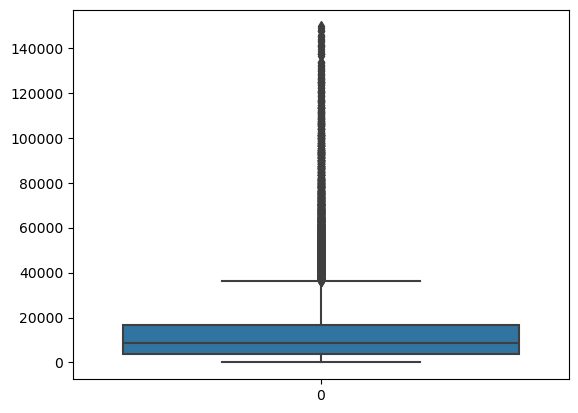

In [67]:
sns.boxplot(df2.revol_bal)

In [68]:
# We can see Revolving balance also have some outliers which will impact analysis, hence removing them.
df3 = df2[-(df2.revol_bal >= 40000)]

In [70]:
# Validating if values are removed.
df3[(df3.revol_bal >= 40000)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


In [71]:
## Checking for instance where funded amount greater than loan amount as it shoud not be possible.
df3[df3.funded_amnt>df3.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


In [72]:
## Checking for instance where funded amount Inv greater than funded amount as it should not be possible.
df3[df3.funded_amnt_inv>df3.funded_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


# 1. UNI-VARIATE ANALYSIS :


## (i) ON ANNUAL SALARY

In [73]:
df3.annual_inc.describe().apply(lambda x: format(x, 'f'))

count     36680.000000
mean      62255.157205
std       31251.951392
min        4000.000000
25%       40000.000000
50%       55992.000000
75%       78000.000000
max      199992.000000
Name: annual_inc, dtype: object

Text(0, 0.5, 'Annual Salary')

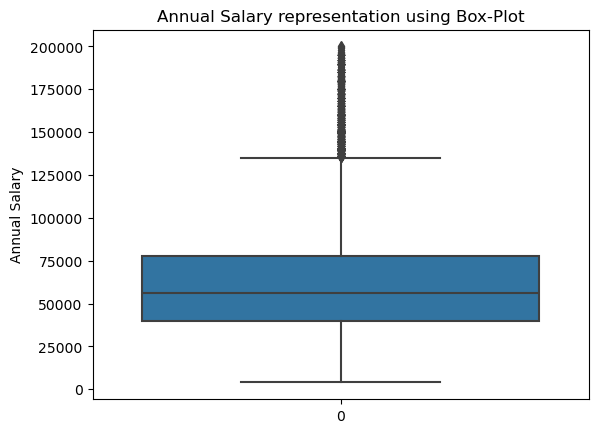

In [76]:
sns.boxplot(df3.annual_inc)
plt.title('Annual Salary representation using Box-Plot')
plt.ylabel('Annual Salary')

Text(0.5, 0, 'Annual Salary')

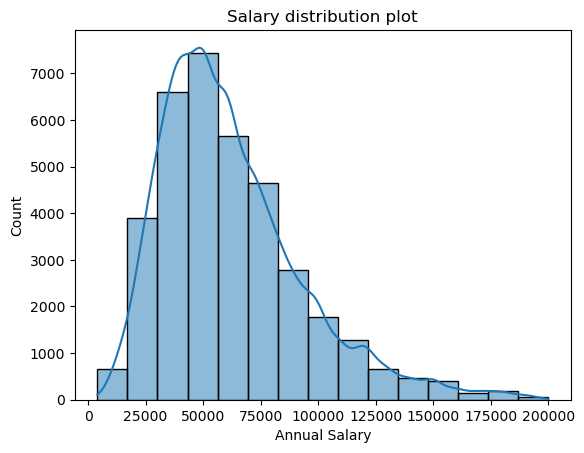

In [77]:
sns.histplot(df3.annual_inc, bins = 15, kde=True)
plt.title('Salary distribution plot')
plt.xlabel('Annual Salary')


In [78]:
df3.shape

(36680, 22)

# INFERENCE:-

Most of the borrowers, who are comming to this organization for loan have an annual salary between 50000 and 70000  where peak lies aroud 5000.

Very few have annual salary greater than 1 lakh.

The initial distribution plot showed that there is a long tail due to some outliers in annual salary(Lying between 2000000 to 6000000) post removing them we got a distribution in salary with little skewness.


## (ii) ON LOAN AMOUNT, FUNDED AMOUNT AND AMOUNT COMMITED BY INVESTORS.

In [79]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0


In [80]:
df3.loan_amnt.describe()

count    36680.000000
mean     10833.519629
std       7145.756148
min        500.000000
25%       5043.750000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

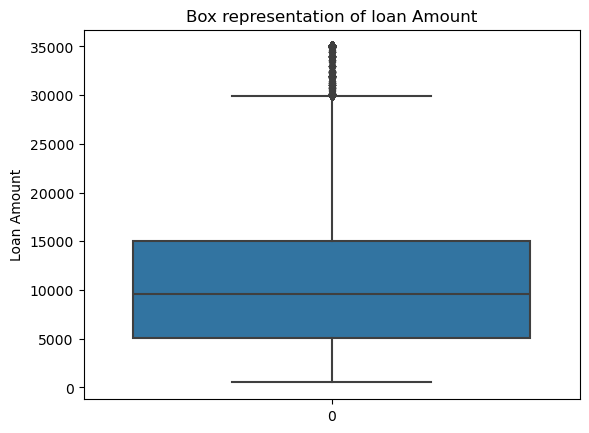

In [81]:
sns.boxplot(df3.loan_amnt)
plt.title("Box representation of loan Amount")
plt.ylabel("Loan Amount")

Text(0.5, 0, 'Loan Amount')

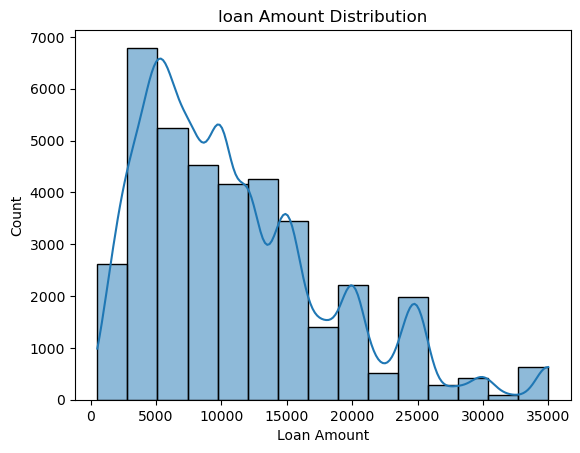

In [54]:
sns.histplot(df2.loan_amnt, bins = 15, kde=True)
plt.title("loan Amount Distribution")
plt.xlabel("Loan Amount")

In [82]:
df3.funded_amnt.describe()

count    36680.00000
mean     10587.08765
std       6890.57882
min        500.00000
25%       5000.00000
50%       9250.00000
75%      14500.00000
max      35000.00000
Name: funded_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

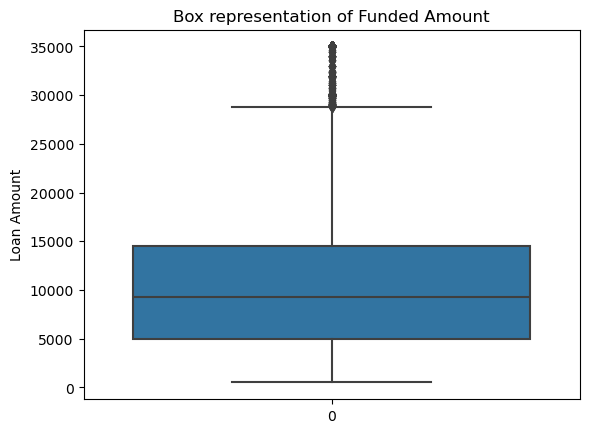

In [83]:
sns.boxplot(df3.funded_amnt)
plt.title("Box representation of Funded Amount")
plt.ylabel("Loan Amount")

Text(0.5, 0, 'Loan Amount')

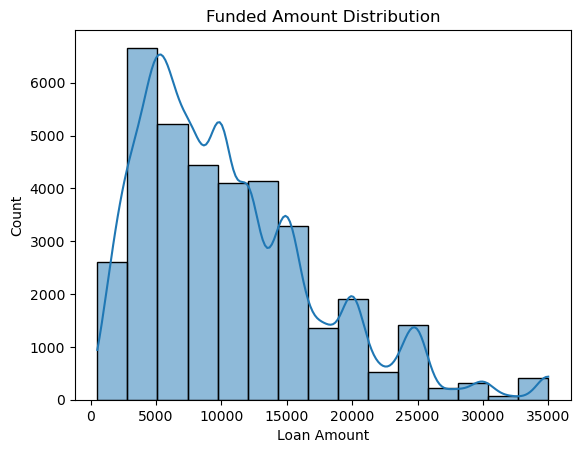

In [84]:
sns.histplot(df3.funded_amnt, bins = 15, kde=True)
plt.title("Funded Amount Distribution")
plt.xlabel("Loan Amount")

In [85]:
df3.funded_amnt_inv.describe()

count    36680.000000
mean     10072.595253
std       6829.083476
min          0.000000
25%       5000.000000
50%       8500.000000
75%      13972.188347
max      35000.000000
Name: funded_amnt_inv, dtype: float64

Text(0, 0.5, 'Commited amount by investors')

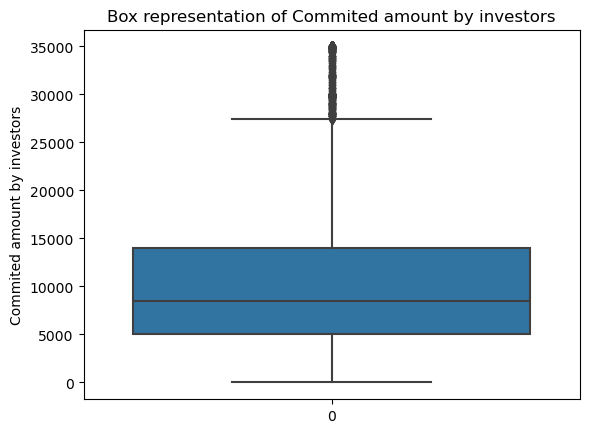

In [86]:
sns.boxplot(df3.funded_amnt_inv)
plt.title("Box representation of Commited amount by investors")
plt.ylabel("Commited amount by investors")

Text(0.5, 0, 'Commited amount by investors')

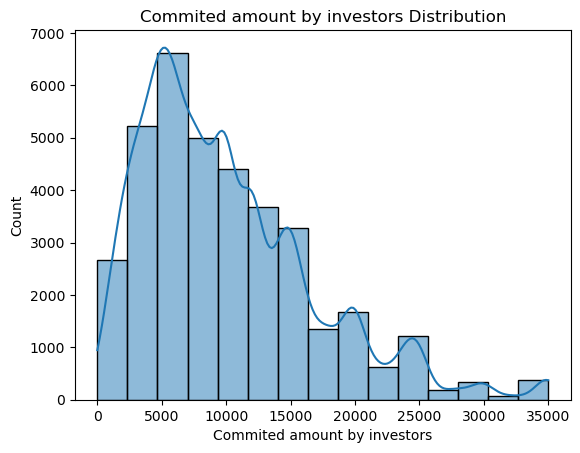

In [87]:
sns.histplot(df3.funded_amnt_inv, bins = 15, kde=True)
plt.title("Commited amount by investors Distribution")
plt.xlabel("Commited amount by investors")

# INFERENCE:-

Loan Amount, Funded amount and Commited amount by investors follow a similar distribution, where distribution is a bit irregular and has a little skewness towards right.
Mostly values of these three columns lies between 5000 to 15000.
This represent that borrowers gets most of the amount they ask for from investors.

## (iii) ON TERM PERIOD

In [88]:
df3.term.value_counts()

term
36    26972
60     9708
Name: count, dtype: int64

Text(0.5, 1.0, 'Term Percent representation')

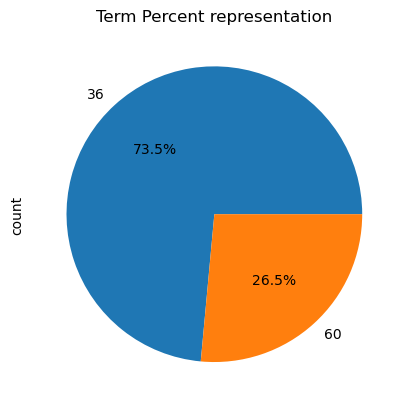

In [89]:
df3.term.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Term Percent representation')

# INFERENCE:-

We can see more than 73 percent borrowers took loan on a term Period of 36 months.This might be to save the interest on funded amount.

## (iv) ON INTEREST RATE

In [90]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0


In [91]:
df3.int_rate.describe()

count    36680.000000
mean        11.979647
std          3.711004
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

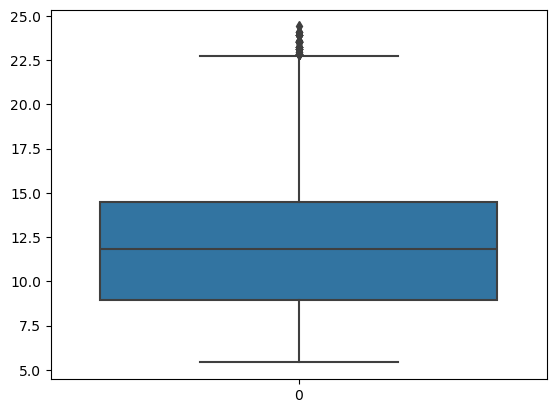

In [92]:
sns.boxplot(df3.int_rate)

<Axes: xlabel='int_rate', ylabel='Count'>

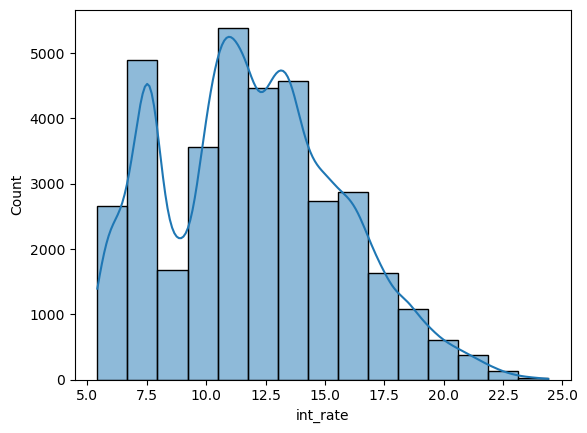

In [93]:
sns.histplot(df3.int_rate, bins = 15, kde=True)

# INFERENCE:-

From Box plot it can be seen that interest rates lies mostly between 9% to 15 %, but from distribution plot we can see there is a drop in interest rate at around ~ 8% and most common interest rates are 6-7% and 10-15%.

# (v) ON INSTALLMENTS

In [110]:
df3.installment.describe()

count    36680.000000
mean       313.723552
std        198.971492
min         15.690000
25%        163.960000
50%        273.390000
75%        411.710000
max       1288.100000
Name: installment, dtype: float64

<Axes: xlabel='installment', ylabel='Count'>

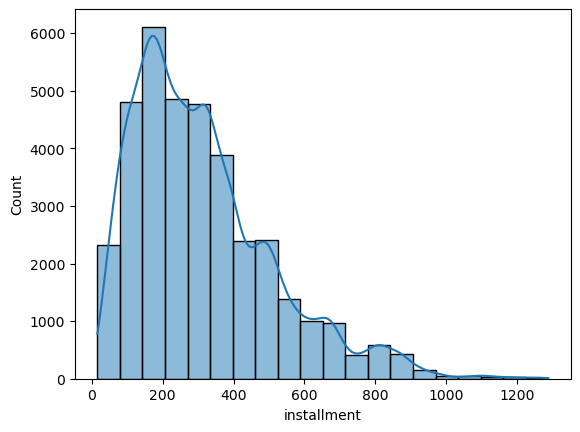

In [96]:
sns.histplot(df3.installment, bins = 20, kde=True)

<Axes: >

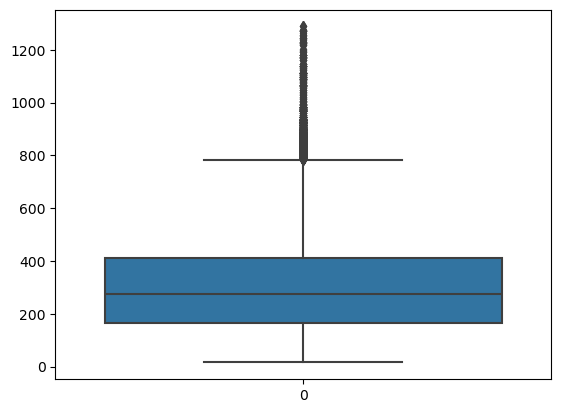

In [97]:
sns.boxplot(df3.installment)

# INFERENCE:-

Installments lie between 200-400 for most of the population and there is a huge peak at 200 as seen on distribution plot.

## (vi) ON GRADE

<Axes: ylabel='count'>

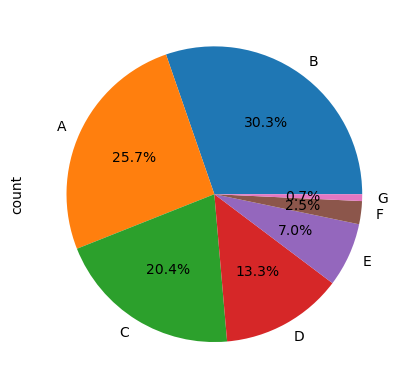

In [98]:
df3.grade.value_counts().plot.pie(autopct='%1.1f%%')


# INFERENCE:-

Grading order is B>A>C>D>E, Very few loans are under grade F and G, most probably due to risk on those grades.
More than 90% of the Loans are under A,B,C and D Grade.

## (vii) ON EMPLOYMENT PERIOD

<Axes: ylabel='count'>

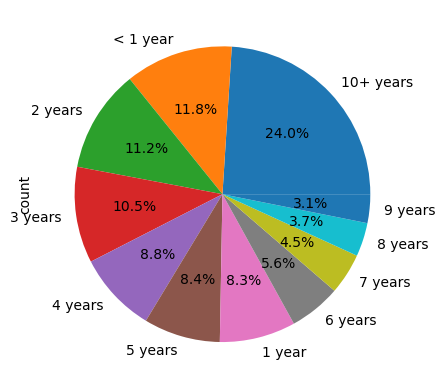

In [99]:
df3.emp_length.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-

Most Of the people working for more than 10 years have maximum percentage(~25%) of loans.
<br>
Also It seems from graph that People working for <1, 2 and 3 Years contribute for 33% of the loans, This may be because they are borrowing money for startups or career growth.
<br>
1,4 and 5 have nearly same contribution(8-9%) and for 6,7,8 and 9 have the lowest contribution and contribution in loans decreases respectively for each.

## (viii) ON HOME OWNERSHIP

<Axes: ylabel='count'>

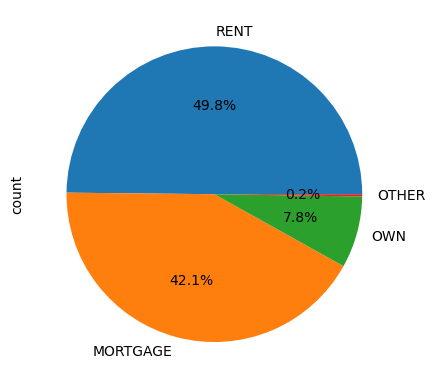

In [100]:
df3.home_ownership.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-

People living in rent have highest contribution in loan, which is very near to mortgage as it seems people living in rent might take loan for homes and later one for paying mortgage.
<br>
Very low percentage of people having own house applied for loan.

## (ix) ON VERIFICATION STATUS

<Axes: ylabel='count'>

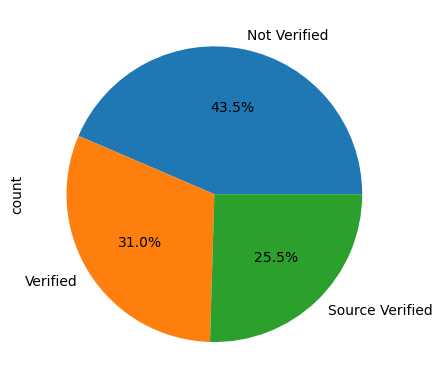

In [101]:
#On verification Status
df3.verification_status.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-

More than 40% of the borrowers are not verified, some are verified and very few are sourced verified.

In [109]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0


## (x) ON PURPOSE OF LOAN

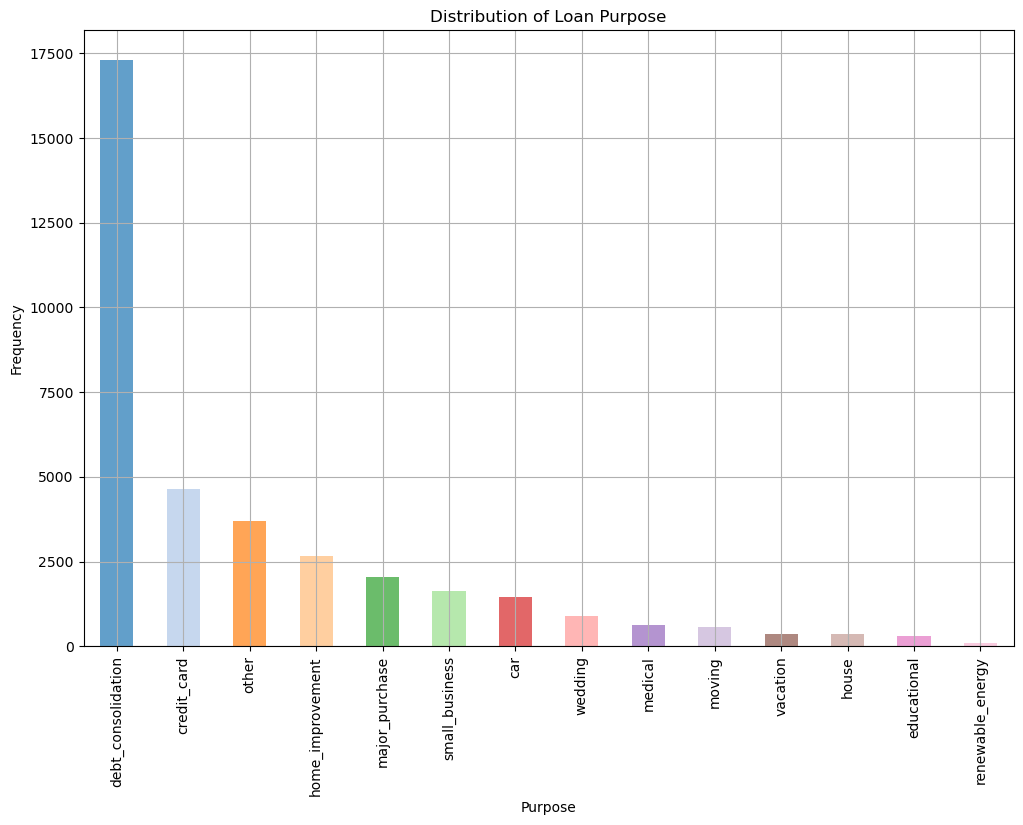

In [103]:
# Plot the distribution of the purpose of loans
plt.figure(figsize=(12, 8))

# Get the value counts of loan purposes
purpose_counts = df3['purpose'].value_counts()

# Create a list of colors
colors = plt.cm.tab20(range(len(purpose_counts)))

# Plot the bar chart with different colors
purpose_counts.plot(kind='bar', alpha=0.7, color=colors)

plt.title('Distribution of Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# INFERENCE

Most of the loans are for paying other debts. After that loans taken are for home and business improvement.

## (xi) ON STATE

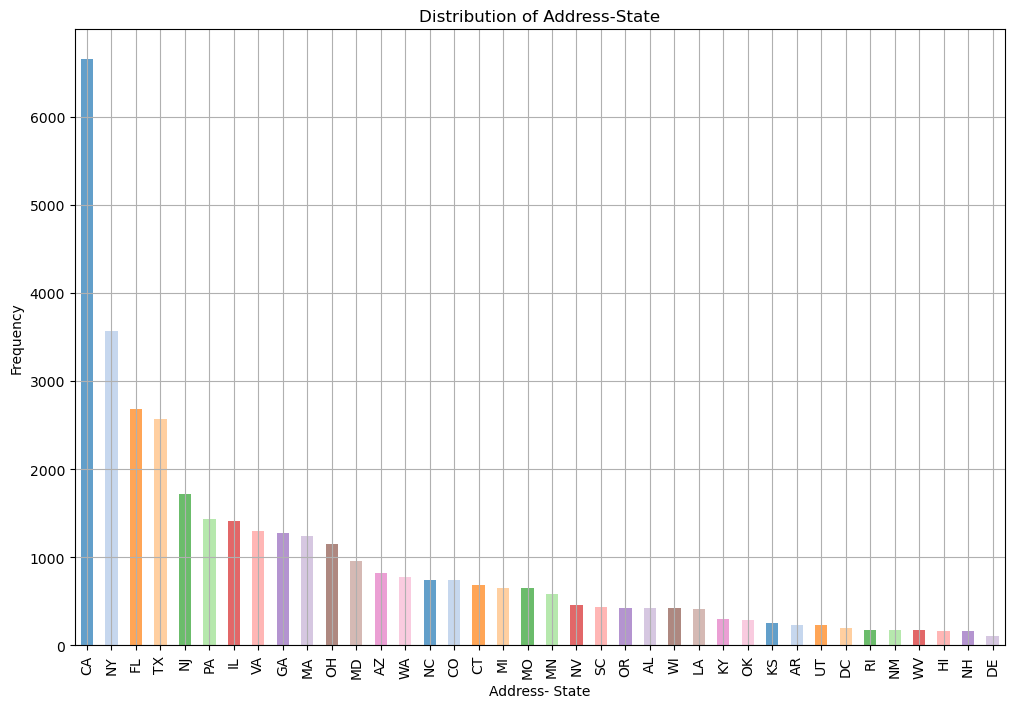

In [104]:
# Based on state
# Plot the distribution of the purpose of loans
plt.figure(figsize=(12, 8))

# Get the value counts of loan purposes
addr_state_counts = df3['addr_state'].value_counts()

# Create a list of colors
colors = plt.cm.tab20(range(len(purpose_counts)))

# Plot the bar chart with different colors
addr_state_counts.plot(kind='bar', alpha=0.7, color=colors)

plt.title('Distribution of Address-State')
plt.xlabel('Address- State')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# INFERENCE:-

Majority of folks applying for loan are from CA, NY, FL and TX

## (xii) ON DTI

In [108]:
df3.dti.describe()

count    36680.000000
mean        13.229438
std          6.669889
min          0.000000
25%          8.090000
50%         13.290000
75%         18.490000
max         29.990000
Name: dti, dtype: float64

Text(0, 0.5, 'DTI')

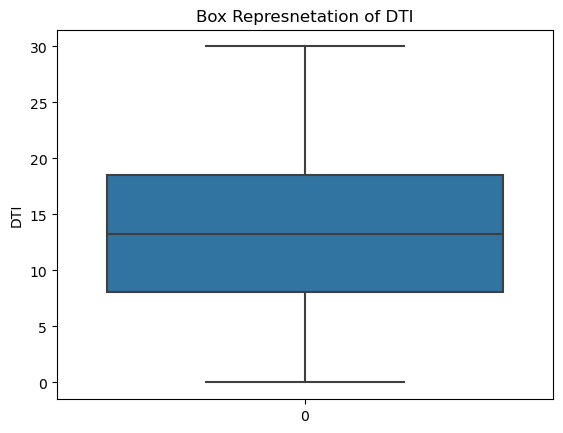

In [105]:
sns.boxplot(df3.dti)
plt.title("Box Represnetation of DTI")
plt.ylabel("DTI")

<Axes: xlabel='dti', ylabel='Count'>

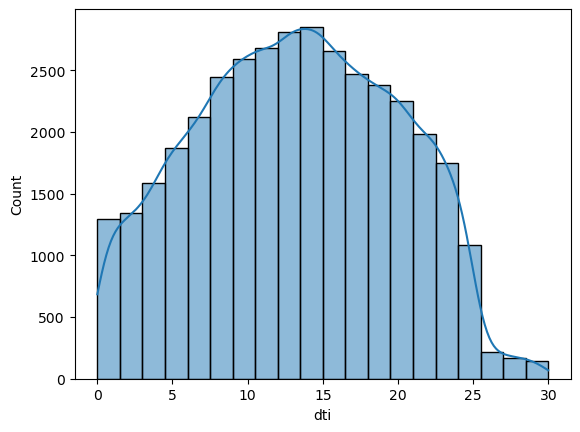

In [106]:
sns.histplot(df3.dti, bins=20, kde=True)

# INFERENCE:-

We can see DTI value lies mostly between 8-19 and has highest peak at 15 as shown in distribution plot.
<br>
The distribution nearly has a bell shape, median and mean value are same which shows data in it is evenly distributed.

## (xiii) ON REVOLVING BALANCE

In [112]:
df3.revol_bal.describe()

count    36680.000000
mean     10435.543539
std       8851.583844
min          0.000000
25%       3432.750000
50%       8184.000000
75%      15147.500000
max      39981.000000
Name: revol_bal, dtype: float64

Text(0, 0.5, 'revoling Balance')

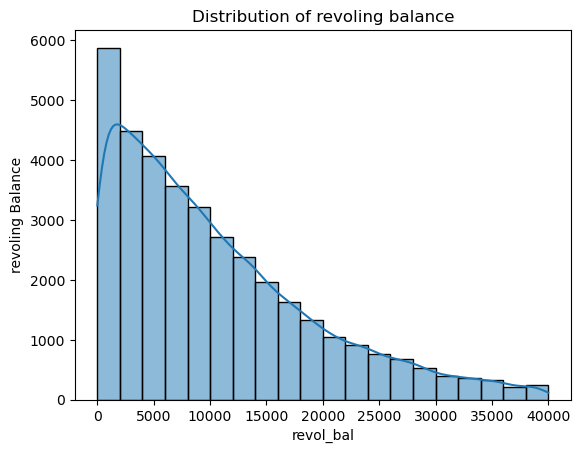

In [115]:
sns.histplot(df3.revol_bal,bins = 20, kde=True)
plt.title("Distribution of revoling balance")
plt.ylabel("revoling Balance")

Text(0, 0.5, 'revoling balance')

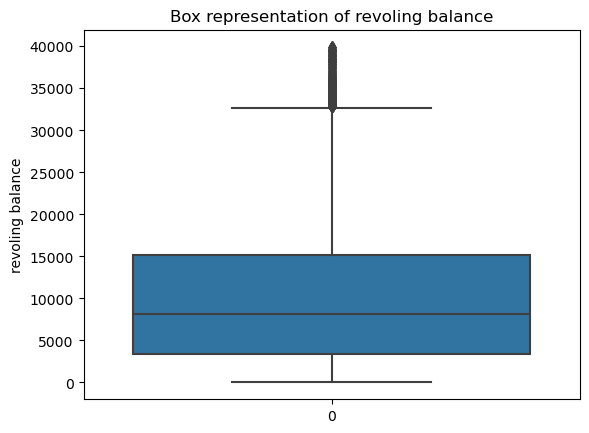

In [117]:
sns.boxplot(df3.revol_bal)
plt.title("Box representation of revoling balance")
plt.ylabel("revoling balance")

# INFERENCE:-
    
We can infer that most of the people have low revolving balance, Revolving balnce value lies mostly between 5000 to 18000.

## (xiv) ON REVOLVING UTILITY

Text(0, 0.5, 'revoling utility')

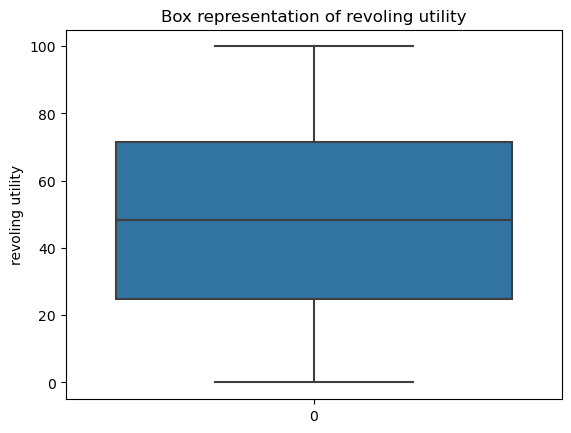

In [118]:

sns.boxplot(df3.revol_util)
plt.title("Box representation of revoling utility")
plt.ylabel("revoling utility")

Text(0.5, 0, 'revoling utility')

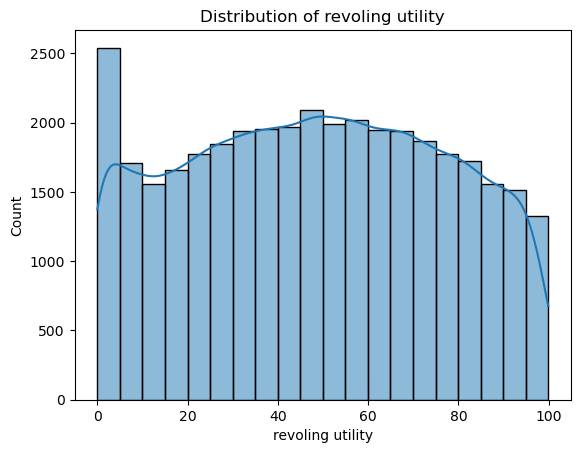

In [119]:
sns.histplot((df3.revol_util), bins = 20, kde=True)
plt.title("Distribution of revoling utility")
plt.xlabel("revoling utility")

# INFERENCE:-

We can see that the revolving line utilization rates lies mostly between 25 to 75 percent, distribution plot shows a uniform bell curve which signifies data is well distributed.
<br>
Also most of the revolving utility values are 0.

In [120]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0


## (xv) ON DELINQUENCY AND BANKRUPTCIES

In [123]:

df3.delinq_2yrs.value_counts()

delinq_2yrs
0     32681
1      3068
2       626
3       207
4        58
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [124]:
df3.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    35049
1.0     1624
2.0        7
Name: count, dtype: int64

## CREATING DERIVED METRICS FROM EXISTING VARIABLES

In [125]:
# We can see Most of the values of deliquent in last 2 years lies at 0 and few values lies after 2.
# creating categorical variables using delinq_2yrs columns and pub_rec_bankruptcies for easier analysis.

In [126]:
df3['delinquency_in_2years'] = df3.delinq_2yrs.apply(lambda x : 'No Delinquency' if x==0 else 'Delinquency Occured')

In [127]:
df3['bankruptcies_occured'] = df3.pub_rec_bankruptcies.apply(lambda x : 'No Bankruptcies' if x==0 else 'Bankruptcies Occured')

In [128]:
# Creating seperate columns for month and year 
df3['month'] = pd.DatetimeIndex(df3['issue_d']).month
df3['Year'] = pd.DatetimeIndex(df3['issue_d']).year

In [129]:
# Checking updated coulmns in dataframe.
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,delinquency_in_2years,bankruptcies_occured,month,Year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0,No Delinquency,No Bankruptcies,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0,No Delinquency,No Bankruptcies,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0,No Delinquency,No Bankruptcies,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0,No Delinquency,No Bankruptcies,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0,No Delinquency,No Bankruptcies,12,2011


<Axes: ylabel='count'>

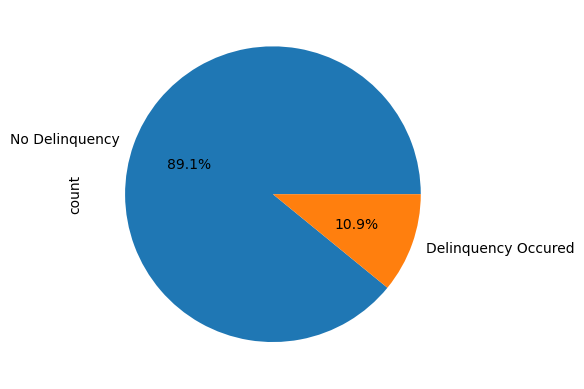

In [131]:
df3.delinquency_in_2years.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

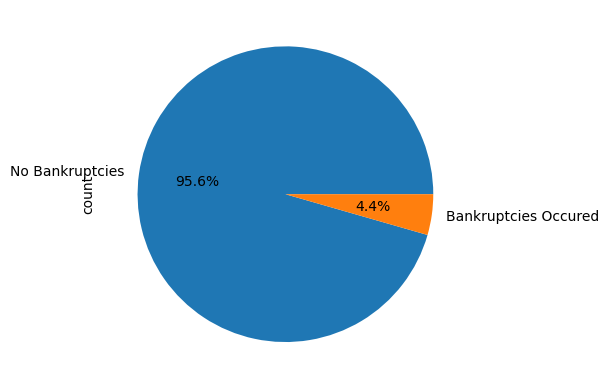

In [193]:
df3.bankruptcies_occured.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-

We can see ~96% of the borrowers have no record of delinquency in past 2 years.
<br>
More than 95% of folks have no records of bankruptcies.

## (xvi) ON MONTH AND YEAR

<Axes: ylabel='count'>

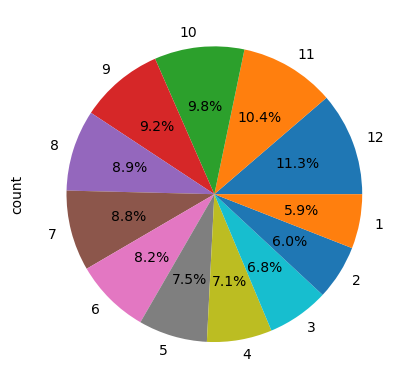

In [104]:
df3.month.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

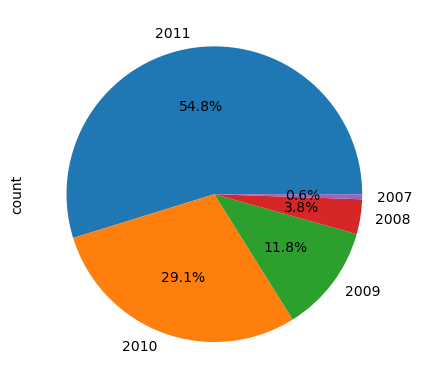

In [105]:
df3.Year.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-
    
We can see most of the loans were taken on month of November and least number of loans were taken in February.
<br>
Also loans are almost getting doubled year after another 2007 having least percentage of loans whereas 2011 have highest percentage.

## (xvii) ON TOTAL NUMBER OF CREDIT LINE

In [133]:

df3.total_acc.describe()

count    36680.000000
mean        21.489940
std         11.156897
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

Text(0.5, 0, 'Total number of credit lines')

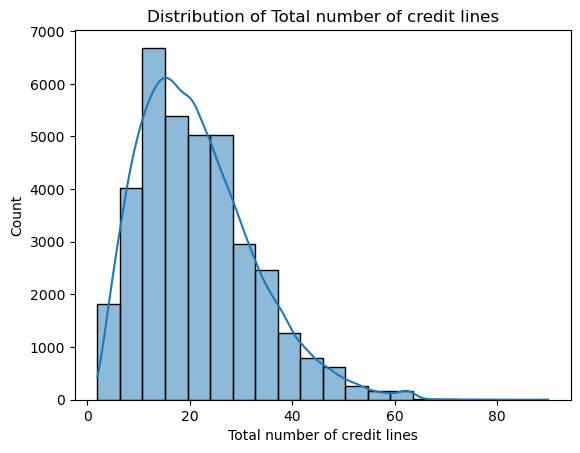

In [107]:
sns.histplot(df3.total_acc, bins = 20, kde=True)
plt.title("Distribution of Total number of credit lines")
plt.xlabel("Total number of credit lines")

Text(0, 0.5, 'Total number of credit lines')

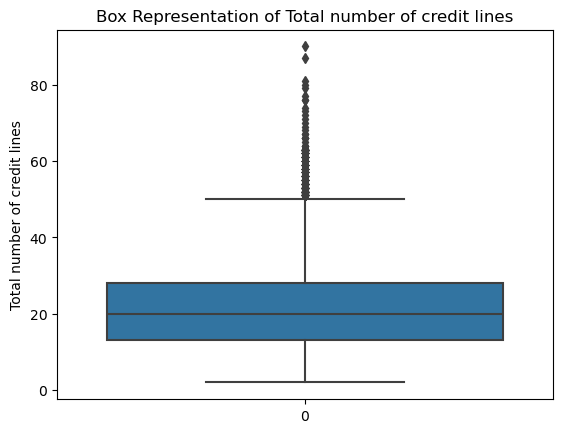

In [134]:
sns.boxplot(df3.total_acc)
plt.title("Box Representation of Total number of credit lines")
plt.ylabel("Total number of credit lines")

# INFERENCE:-

We can see most of the values lies between 15 to 25 and there is a peak at 10 in the histogram.

## (xviii) ON LOAN STATUS

<Axes: ylabel='count'>

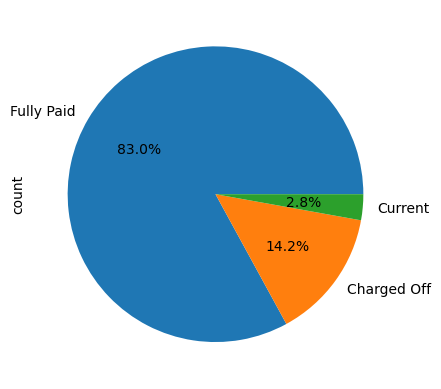

In [135]:
df3.loan_status.value_counts().plot.pie(autopct='%1.1f%%')

# INFERENCE:-

As we can see most of the people(>80%) fully paid their loans back and few people, under 15% are defaulters.
<br>
Further analysis will help us determine characterstics and statistics of people who pay and does'nt pay back their borrowed money.

# 2. SEGMENTED UNI-VARIATE ANALYSIS:

In [136]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,delinquency_in_2years,bankruptcies_occured,month,Year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0,No Delinquency,No Bankruptcies,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0,No Delinquency,No Bankruptcies,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0,No Delinquency,No Bankruptcies,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0,No Delinquency,No Bankruptcies,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,27783,53.9,38,0.0,No Delinquency,No Bankruptcies,12,2011


## (i) ON LOAN AMOUNT, FUNDED AMOUNT AND AMOUNT COMMITED BY INVESTORS BY LOAN STATUS.

Text(0.5, 1.0, 'Funded amount invested with respect to loan status')

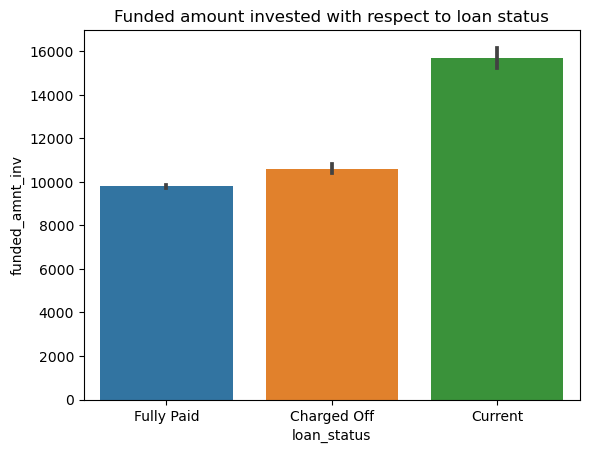

In [138]:
# Checking funded amount invested by investor with respect to Loan status.
sns.barplot(data=df3,x='loan_status',y='funded_amnt_inv')
plt.title('Funded amount invested with respect to loan status')


Text(0.5, 1.0, 'Loan Amount with respect to loan status')

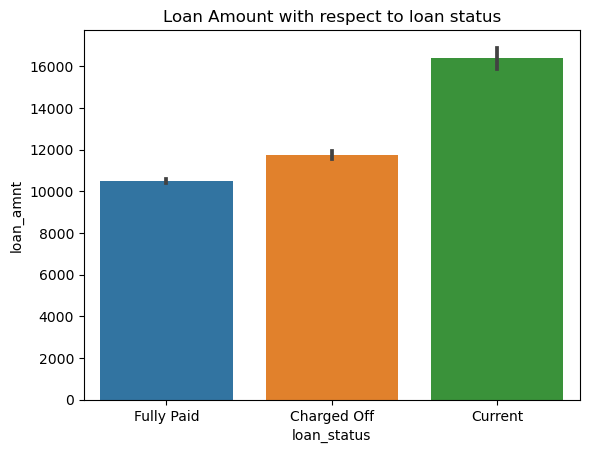

In [139]:
# Checking Loan amount with respect to Loan status.
sns.barplot(data=df3,x='loan_status',y='loan_amnt')
plt.title('Loan Amount with respect to loan status')

Text(0.5, 1.0, 'Funded Amount with respect to loan status')

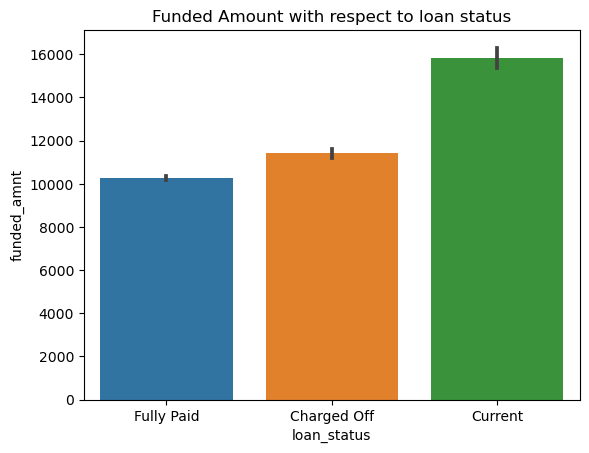

In [140]:
# Checking Funded amount amount with respect to Loan status.
sns.barplot(data=df3,x='loan_status',y='funded_amnt')
plt.title('Funded Amount with respect to loan status')

Text(0.5, 1.0, 'Funded Amount with respect to loan status Box Representation')

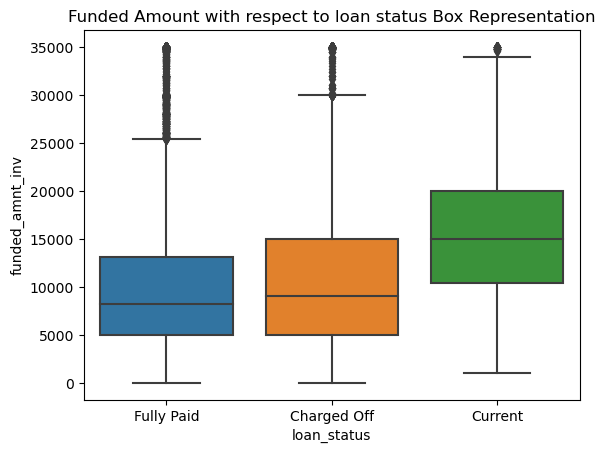

In [114]:
sns.boxplot(data=df3,x='loan_status',y='funded_amnt_inv')
plt.title('Funded Amount with respect to loan status Box Representation')

## (ii) ON INTEREST RATE BY LOAN STATUS

Text(0.5, 1.0, 'Interest rate with respect to loan status')

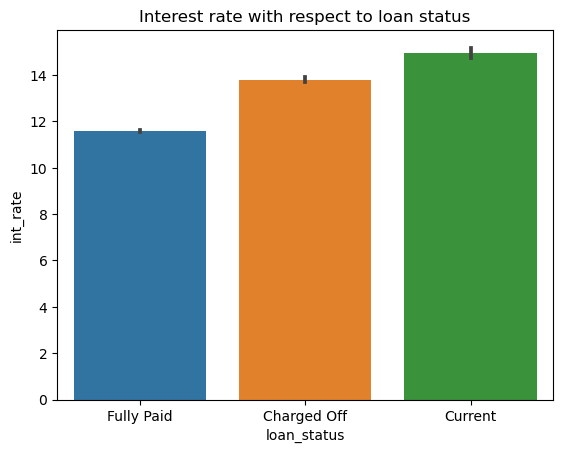

In [115]:
sns.barplot(data=df3,x='loan_status',y='int_rate')
plt.title('Interest rate with respect to loan status')

Text(0.5, 1.0, 'Box Representation of Interest rate with respect to loan status')

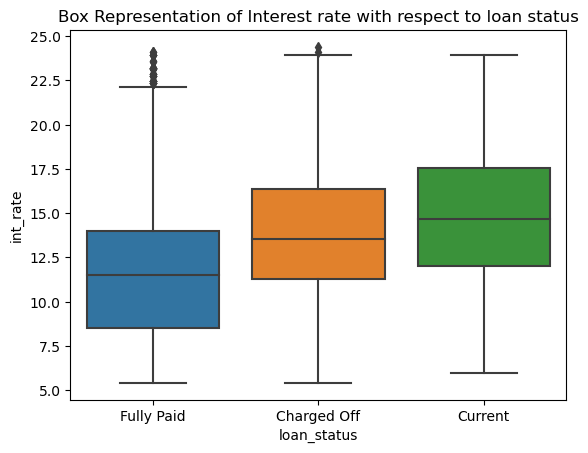

In [116]:
sns.boxplot(data=df3,x='loan_status',y='int_rate')
plt.title('Box Representation of Interest rate with respect to loan status')

## (iii) ON INSTALLMENTS BY LOAN STATUS

Text(0.5, 1.0, 'Installment with respect to loan status')

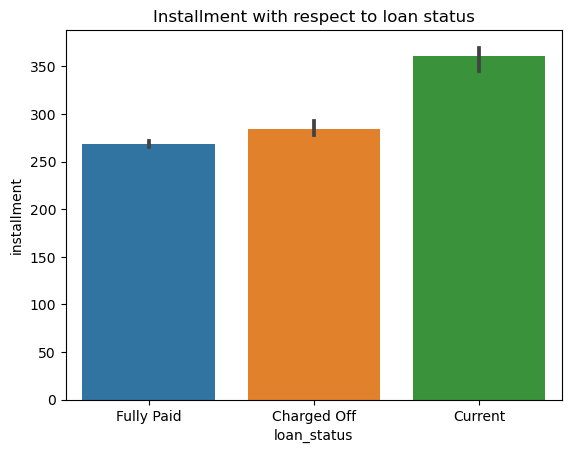

In [117]:
sns.barplot(data=df3,x='loan_status',y='installment',estimator='median')
plt.title('Installment with respect to loan status')

# INFERENCE:-

It is clear from graphs that charged off borrowers have a higher funding amount,interest rates and installments compared to fully paid ones.
Also interest rates seems to be much higher compared to funded amount.

## (iv) ON REVOLVING BALANCE BY LOAN STATUS

Text(0.5, 1.0, 'Revolving Balance with respect to loan status')

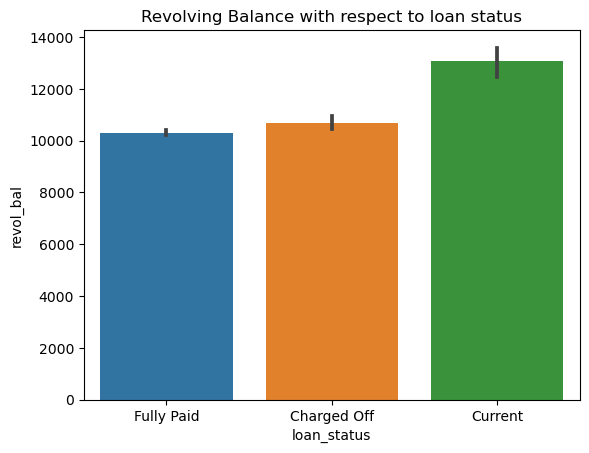

In [141]:
sns.barplot(data=df3,x='loan_status',y='revol_bal')
plt.title('Revolving Balance with respect to loan status')

# INFERENCE:-

Borrowers who are likely to default have higher average revolving balance than fully paid onces.

## (v) ON ANNUAL INCOME BY LOAN STATUS

Text(0.5, 1.0, 'Annual Income with respect to loan status')

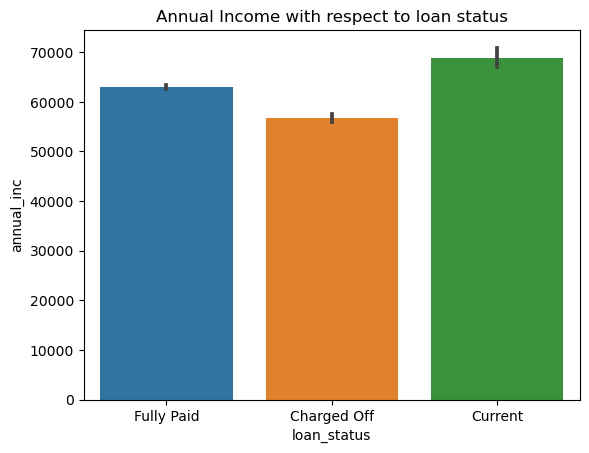

In [119]:
# On annual Income.
sns.barplot(data=df3,x='loan_status',y='annual_inc')
plt.title('Annual Income with respect to loan status')

# INFERENCE:-

Higher income depicts lower chances of defaulting.

## (vi) ON NUMBER OF CREDIT LINES BY LOAN STATUS

Text(0.5, 1.0, 'No of credit lines with respect to loan status')

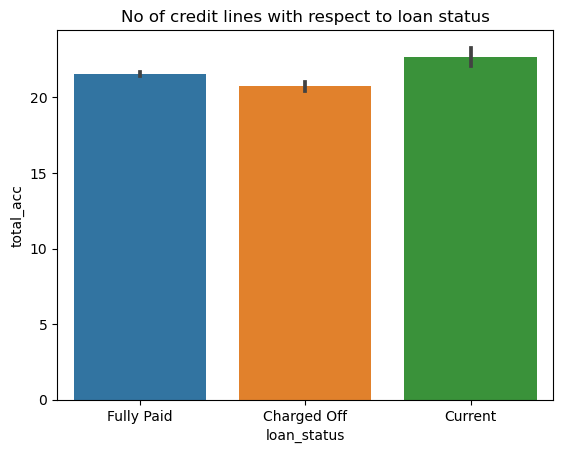

In [120]:
sns.barplot(data=df3,x='loan_status',y='total_acc')
plt.title('No of credit lines with respect to loan status')

Text(0.5, 1.0, 'Box representation No of credit lines with respect to loan status')

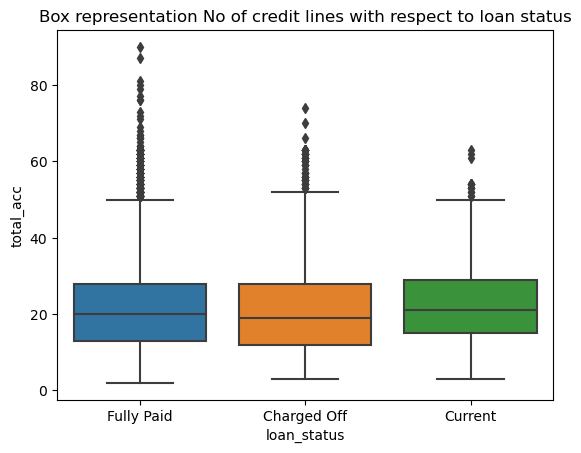

In [121]:
sns.boxplot(data=df3,x='loan_status',y='total_acc')
plt.title('Box representation No of credit lines with respect to loan status')

# INFERENCE:-

Fully paid customers have a higher number of credit lines in file compared to charged off Customers. Also,the outliers are seen more in the first case.

## (vii) ON DEBT TO INCOME RATIO BY LOAN STATUS

Text(0.5, 1.0, 'DTI with respect to loan status')

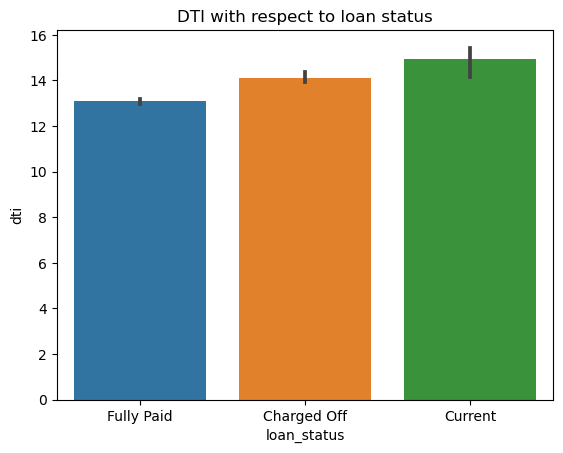

In [122]:

sns.barplot(data=df3,x='loan_status',y='dti',estimator='median')
plt.title('DTI with respect to loan status')

# INFERENCE:-

Customers with Higher DTI are more likely to be defaulters.

## (viii) ON RVOLVING UTILIZATION BY LOAN STATUS

Text(0.5, 1.0, 'Revolving Utilization with respect to loan status')

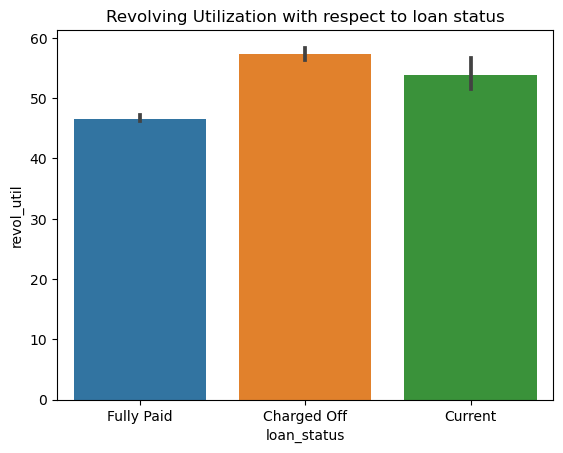

In [142]:
sns.barplot(data=df3,x='loan_status',y='revol_util',estimator = 'median')
plt.title('Revolving Utilization with respect to loan status')

# INFERENCE:-

Customers with Higher value Revolving Utilization Rates are more likely to be defaulters.

# INFERENCES DRAWN FROM UNI VARIATE AND SEGMENTED UNIVARIATE ANALYSIS:-

#### FROM UNIVARIATE:

1) More than 80% of the loans were fully paid.
2) Most of the loans were taken in the month of November and least number of loans were taken in February.
3) Loans were almost getting doubled year after year- 2007 having least percentage of loans whereas 2011 have highest percentage of loans. This implies that year after year this company is growing.
4) More than 95% of folks had no records of bankruptcies and nearly 90% had no previous delinquency.
5) Majority of folks applying for loan were from CA, NY.
6) Most of the loans were for paying other debts. After that, loans taken were for home and business improvement.
7) More than 40% of the borrowers were not verified, some were verified and very few were sourced verified.
8) People living in rented and mortgage houses took majority of loans.
9) People working for more than 10 years took highest percentage of loan(~25%), People working for <1, 2 and 3 Years contributed for 33% of the loans. This may be because they were borrowing money for startups or career growth.
10) More than 73 percent borrowers took loan on a term period of 36 months, this might be to save the interest on funded amount.
11) Loan Amount, Funded amount and Committed amount by investors follow a similar distribution. Mostly, values of these three variables lies between 5000 to 15000. This may represent that investors are investing their money in this company and most of the amount was fulfilled by investors. More insights can be derived after performing bivariate analysis.
12) Most of the borrowers who were coming to this organization for loan had an annual salary between 50000 and 70000,  where peak lied around 50000. Very few investors had an annual salary greater than 200000.


#### FROM SEGMENTED UNIVARIATE:

1) Funded amount was an important variable which shows, higher average funded amount, Interest and Installments leads to more number of charged off borrowers, where, interest value plays most significant role.
2) Higher the salary, lower will be the possibility for the borrower to be charged off.
3) Borrowers who were likely to default had higher average revolving balance and revolving utility, where, revolving utility played a more significant role.
4) Fully paid customers had a higher number of credit lines in file compared to charged off, Also outliers are seen more in the first case. They might take more loan but will repay their debt.
5) Customers with Higher Debt-To-Income Ratio were more likely to be defaulters.

# 3. BI-VARIATE ANALYSIS: 

# A. Numerical vs. Numerical Analysis


## (i) SCATTER PLOT BETWEEN LOAN AMOUNT AND FUNDED AMOUNT:

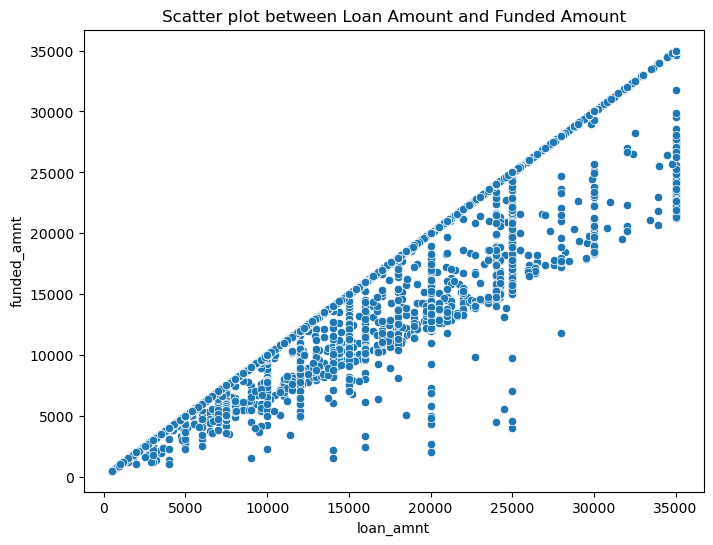

In [150]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df3)
plt.title(f'Scatter plot between Loan Amount and Funded Amount')
plt.show()

# INFERENCE:-

There is a strong positive correlation between Loan Amount and Funded Amount.

## (ii) SCATTER PLOT BETWEEN LOAN AMOUNT AND FUNDED AMOUNT BY INVESTORS

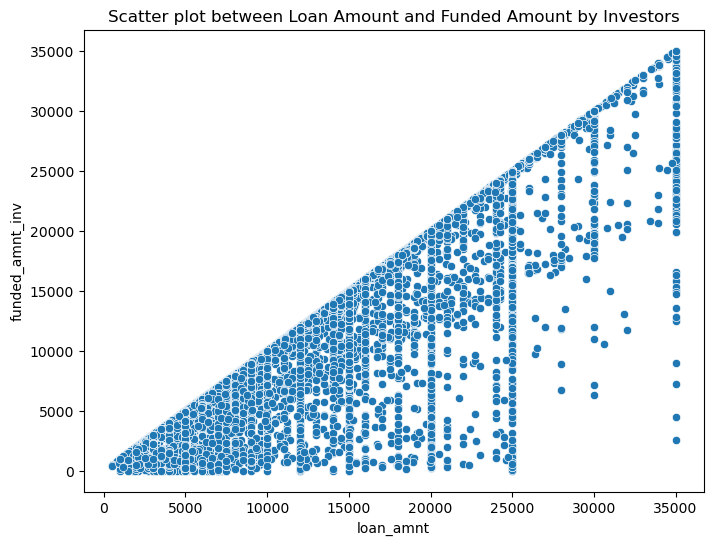

In [151]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt_inv', data=df3)
plt.title(f'Scatter plot between Loan Amount and Funded Amount by Investors')
plt.show()

# INFERENCE:-

There is a strong positive correlation between Loan Amount and Funded Amount by Investors.

## (iii) SCATTER PLOT BETWEEN LOAN AMOUNT AND INSTALLMENT


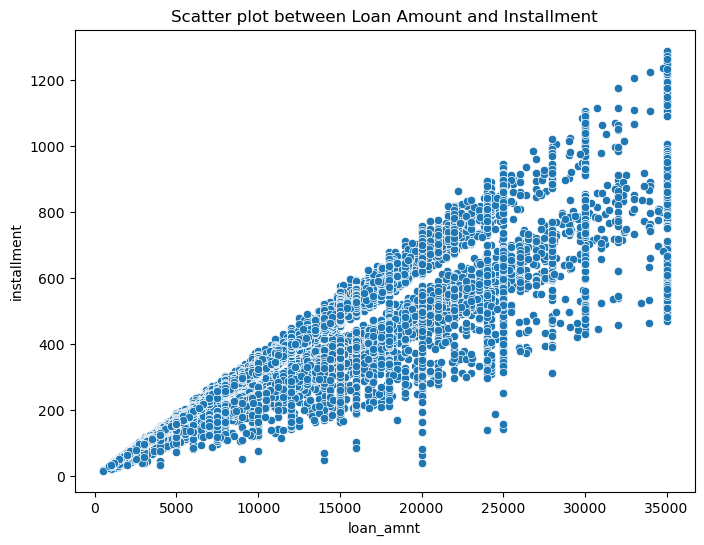

In [152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amnt', y='installment', data=df3)
plt.title(f'Scatter plot between Loan Amount and Installment')
plt.show()

# INFERENCE:- 

There is a strong positive correlation between Loan Amount and Installment.

## (iv) SCATTER PLOT BETWEEN FUNDED AMOUNT AND FUNDED AMOUNT BY INVESTORS

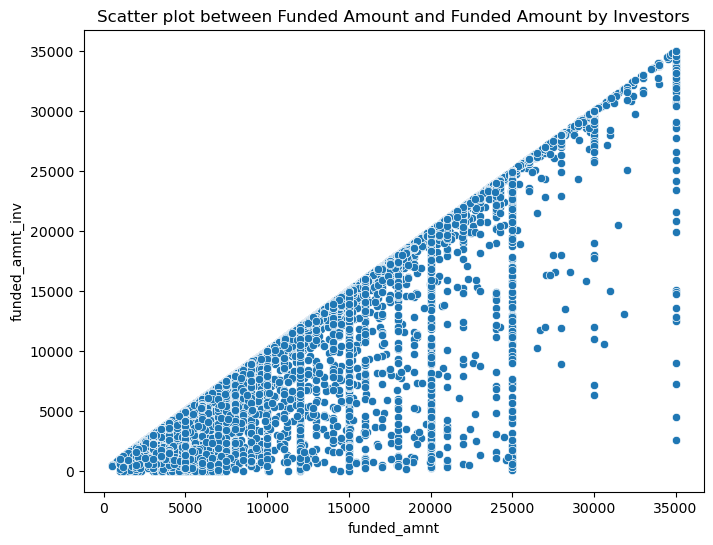

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='funded_amnt', y='funded_amnt_inv', data=df3)
plt.title(f'Scatter plot between Funded Amount and Funded Amount by Investors')
plt.show()

# INFERENCE:-

There is a strong positive correlation between Funded Amount and Funded Amount by Investors.


## (v) SCATTER PLOT BETWEEN FUNDED AMOUNT AND INSTALLMENT

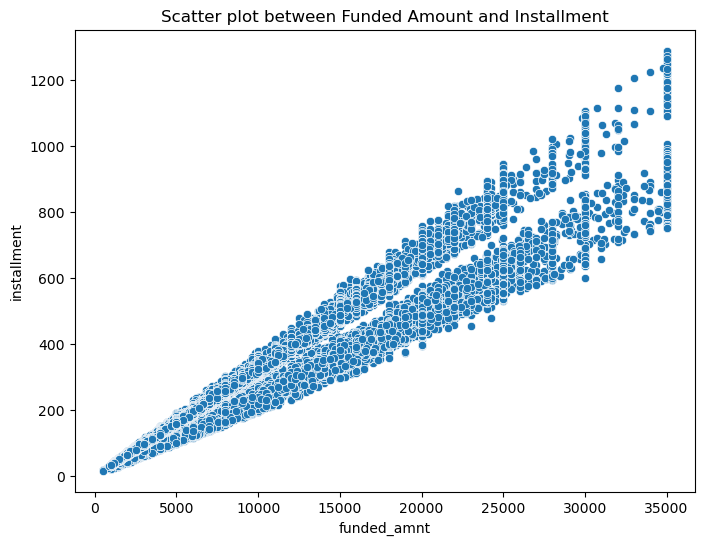

In [154]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='funded_amnt', y='installment', data=df3)
plt.title(f'Scatter plot between Funded Amount and Installment')
plt.show()

# INFERENCE:-

There is a strong positive correlation between Funded Amount and Installment.

## (vi) SCATTER PLOT BETWEEN FUNDED AMOUNT BY INVESTORS AND INSTALLMENT 

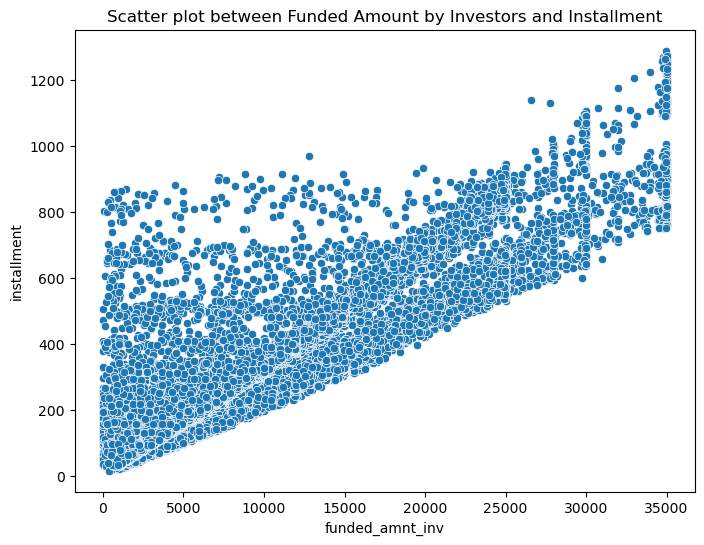

In [155]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='funded_amnt_inv', y='installment', data=df3)
plt.title(f'Scatter plot between Funded Amount by Investors and Installment')
plt.show()

# INFERENCE:-

There is a strong positive linear relationship between Funded Amount by Investors and Installment

## (vii) CORRELATION MATRIX WHEN LOAN STATUS IS 'CHARGED-OFF'

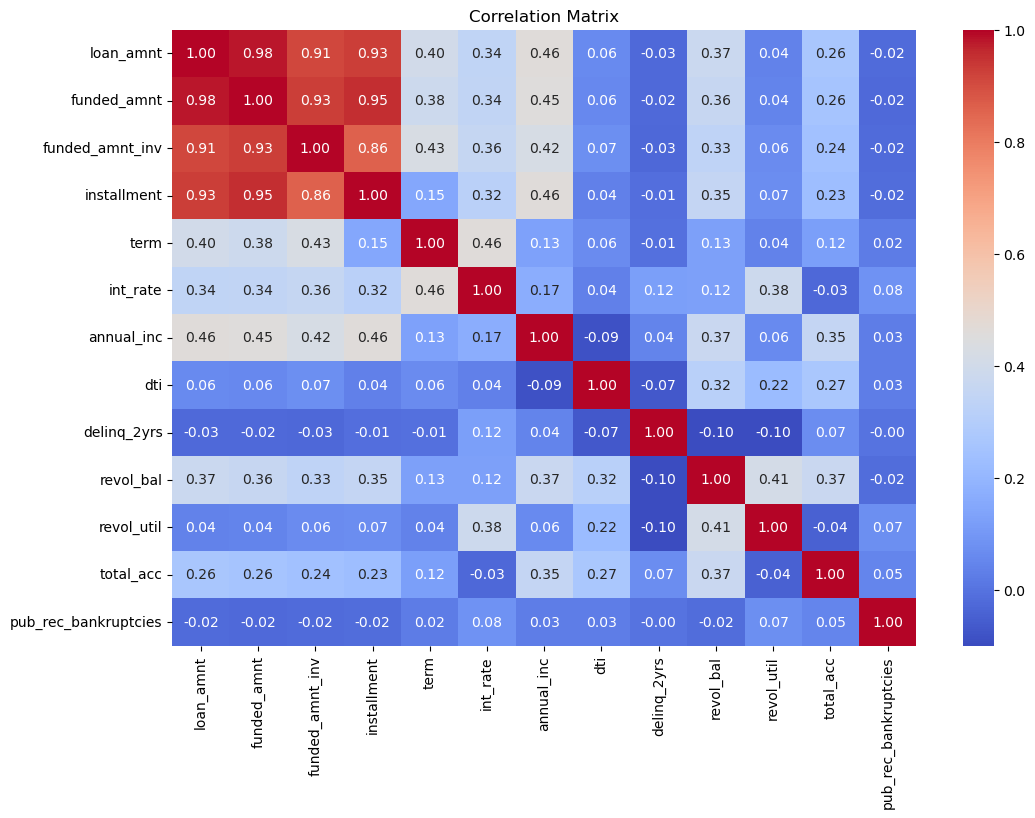

In [156]:
# Define the list of columns for the correlation matrix
columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'term', 'int_rate', 
    'annual_inc', 'dti', 'delinq_2yrs', 'revol_bal', 'revol_util', 'total_acc', 
    'pub_rec_bankruptcies'
     ]

# Compute the correlation matrix
df5=df3[df3['loan_status']=='Charged Off']
correlation_matrix = df5[columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# INFERENCES DRAWN FROM CORRELATION MATRIX WHEN LOAN STATUS IS 'CHARGED-OFF':-

#### High Correlation:

1) Loan Amount and Funded Amount: Very high correlation (0.98), indicating that the amount loaned and the amount funded are almost the same.
2) Loan Amount and Installment: High correlation (0.93), showing that the larger the loan amount, the higher the installment.
3) Funded Amount and Funded Amount Inv: Very high correlation (0.93), indicating that the investor's funded amount closely follows the funded amount.

#### Moderate Correlation:

1) Term and Interest Rate: Moderate correlation (0.46), suggesting longer terms might be associated with higher interest rates.

2) Annual Income and Loan Amount: Moderate correlation (0.46), showing higher annual income might be associated with higher loan amounts.

3) Revolving Balance and Revolving Utilization: Moderate correlation (0.41), indicating that higher revolving balances are associated with higher revolving credit utilization.

#### Low to Negligible Correlation:

1) Debt-to-Income Ratio (DTI) and Loan Amount: Low positive correlation (0.06), indicating that DTI has little impact on the loan amount.


## (viii) CORRELATION MATRIX WHEN LOAN STATUS IS 'FULLY-PAID'

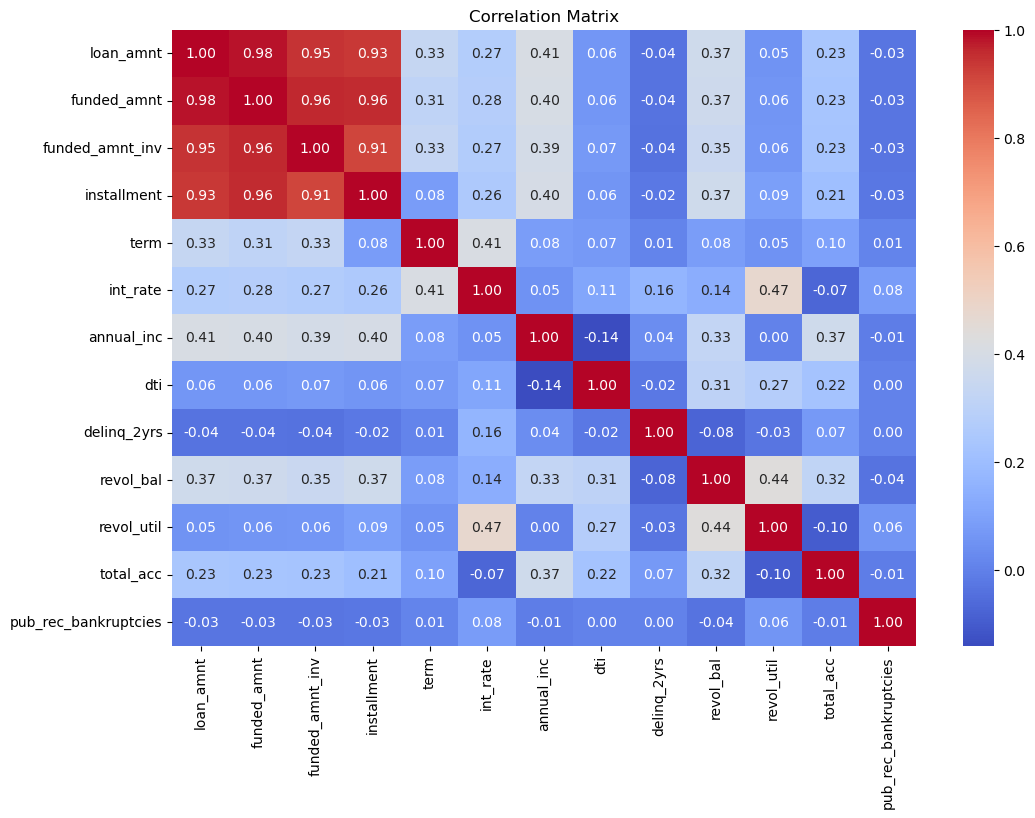

In [157]:
# Define the list of columns for the correlation matrix
columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'term', 'int_rate', 
    'annual_inc', 'dti', 'delinq_2yrs', 'revol_bal', 'revol_util', 'total_acc', 
    'pub_rec_bankruptcies'
     ]

# Compute the correlation matrix
df4=df3[df3['loan_status']=='Fully Paid']
correlation_matrix = df4[columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# INFERENCE DRAWN FROM CORRELATION MATRIX WHEN LOAN STATUS IS 'FULLY-PAID':-

#### High Correlation:

1) Loan Amount and Funded Amount: Very high correlation (0.98), similar to Charged-off loans, indicating consistency across statuses.

2) Loan Amount and Installment: High correlation (0.93), showing the same trend as Charged-off loans.

3) Funded Amount and Funded Amount Inv: Very high correlation (0.93), similar to Charged-off loans.

#### Moderate Correlation:

1) Term and Interest Rate: Slightly lower moderate correlation (0.41) compared to Charged-off loans.

2) Annual Income and Loan Amount: Slightly lower moderate correlation (0.41) than Charged-off loans, suggesting that income is less of a factor in loan amounts for fully paid  loans compared to Charged-off ones.

3) Revolving Balance and Revolving Utilization: Moderate correlation (0.44), slightly higher than Charged-off loans, indicating a stronger relationship between revolving balance and utilization in fully paid loans.

#### Low to Negligible Correlation:

1) Debt-to-Income Ratio (DTI) and Loan Amount: Similar low positive correlation (0.06), indicating consistent low impact of DTI on loan amount.

# KEY COMPARISONS:

#### Consistency in High Correlations: 

Both fully paid and charged-off loans show consistent high correlations between loan amount, funded amount, funded amount by investors and installment, indicating that the fundamental loan structure remains consistent regardless of loan status.

#### Term and Interest Rate: 

The correlation between term and interest rate is slightly higher in charged-off (0.46) compared to fully paid loans (0.41), suggesting that longer terms might be slightly more associated with higher interest rates in charged-off loans.

#### Revolving Balance and Utilization: 

The correlation is stronger in fully paid loans (0.44) than in  charged-off loans (0.41), indicating that higher revolving balances are more critical in fully paid loans.

#### Annual Income: 

The moderate correlation between annual income and loan amount is stronger in charged-off loans (0.46) compared to fully paid loans (0.41), suggesting that higher income borrowers tend to take larger loans and are more likely to not repay them.

# B. Categorical vs. Numerical Analysis

## (i) BOX PLOT OF FUNDED LOAN AMOUNT BY GRADE

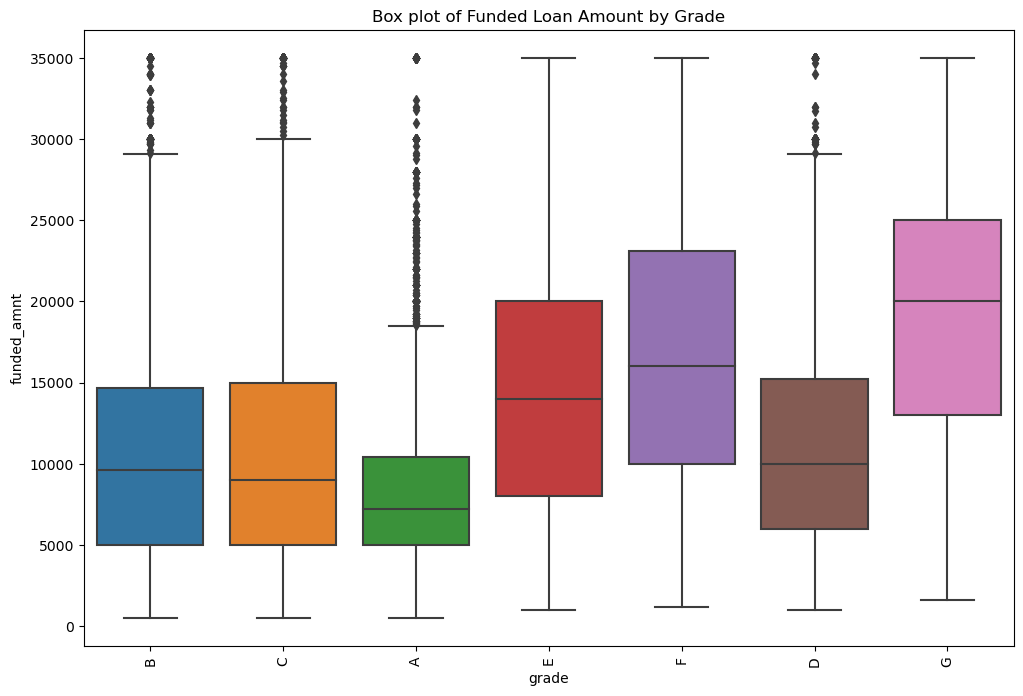

In [158]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Grade')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

#### Median of Funded Loan Amount :

 Funded Loan Amount generally increase with lower grade letters (A being the highest grade and G being the lowest). For instance, the median of Funded Loan Amount for grade A is lower compared to grades E and F.

#### Range of Funded Loan Amount:

The range of Funded Loan Amount(indicated by the interquartile range, or IQR, which is the box) varies across different grades. For example, the IQR for grade A is lower than that for grades E and F.
Grade G loans have a higher median and larger spread compared to other grades, indicating that borrowers with lower grades tend to request and receive larger Funded Loan Amounts.

#### Outliers:

There are several outliers in each grade category, especially noticeable in grades A, B, and C. These outliers represent unusually high loan amounts that are not typical for those grades.
Grades E and F have fewer visible outliers, suggesting that higher Funded Loan Amounts are more common and less extreme in these grades.

#### Funded Loan Amount Distribution:

Lower grades (E, F, G) tend to have higher Funded Loan Amounts, which might indicate that borrowers with lower credit grades are either in greater need of larger sums or that they are granted larger amounts despite their grades.
The distribution shows that higher grade loans (A, B) are typically smaller, reflecting potentially more conservative borrowing by higher credit grade individuals.

#### General Observations:
Risk and Funded Loan Amounts: Lower credit grades (E, F, G) are associated with larger Funded Loan Amounts, which could indicate higher risk as these grades are generally assigned to borrowers perceived to have higher credit risk.
Credit Policy: The differences in Funded Loan Amount across grades might reflect the lending institution's credit policy, where higher amounts are lent to lower grades possibly due to higher interest rates compensating for the risk.

## (ii) BOX PLOT OF FUNDED LOAN AMOUNT BY SUB-GRADE

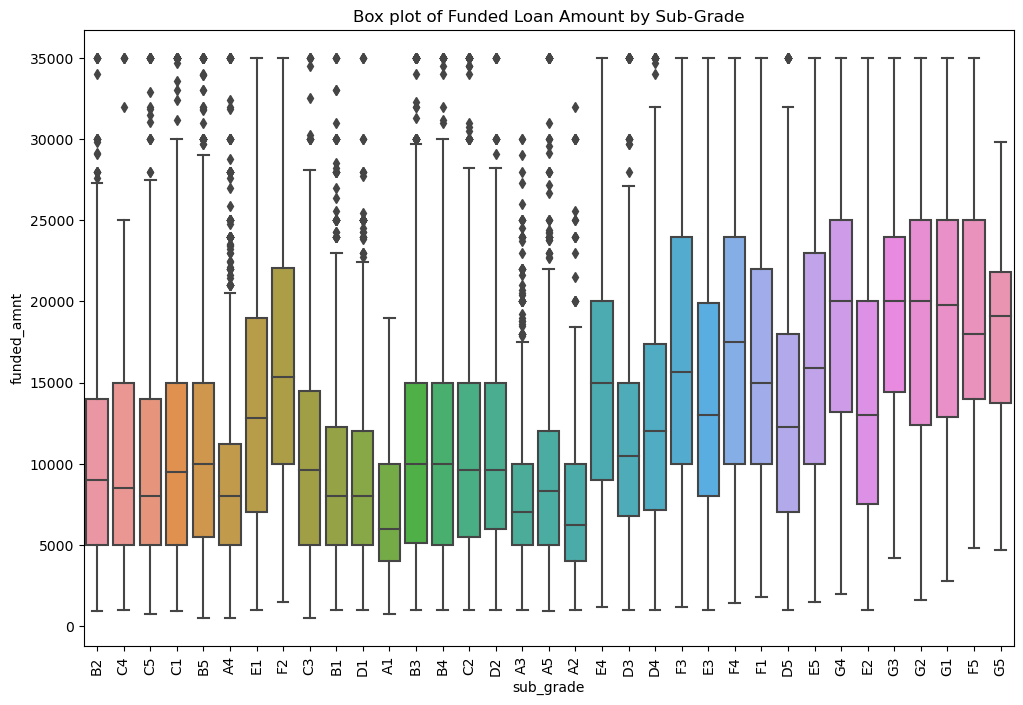

In [159]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='sub_grade', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Sub-Grade')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot provides a detailed view of how loan amounts vary across different sub-grades. It highlights that lower sub-grades (E, F, G) are associated with higher and more variable loan amounts, suggesting a higher risk profile and possibly more aggressive lending strategies in these categories. Higher sub-grades (A, B) are associated with lower and more consistent loan amounts, indicating a more conservative approach to lending for borrowers with higher creditworthiness.

## (iii) BOX PLOT OF FUNDED LOAN AMOUNT BY EMPLOYMENT LENGTH

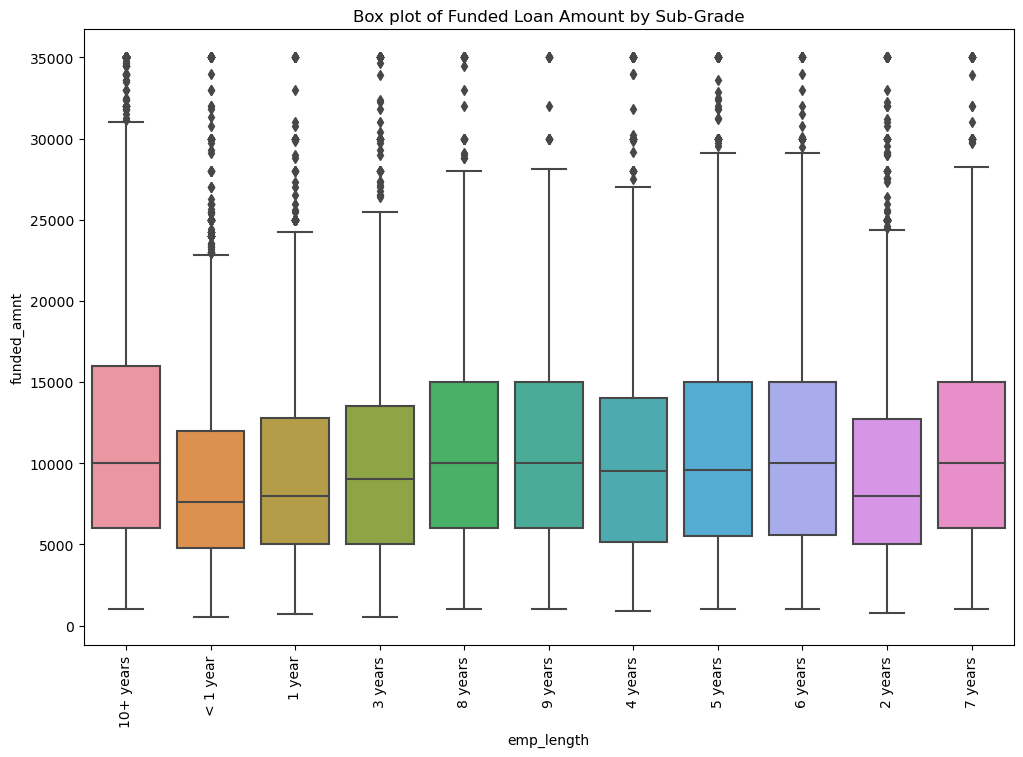

In [160]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='emp_length', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Sub-Grade')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot indicates that funded loan amounts are relatively consistent across different employment lengths, with only minor variations. While borrowers with longer employment lengths (such as "10+ years") tend to receive slightly higher loan amounts, the overall impact of employment length on loan amounts is modest. The presence of outliers in all categories suggests that there are exceptional cases in every employment length, which may be due to specific borrower profiles or lender discretion.

## (iv) BOX PLOT OF FUNDED LOAN AMOUNT BY HOME OWNERSHIP

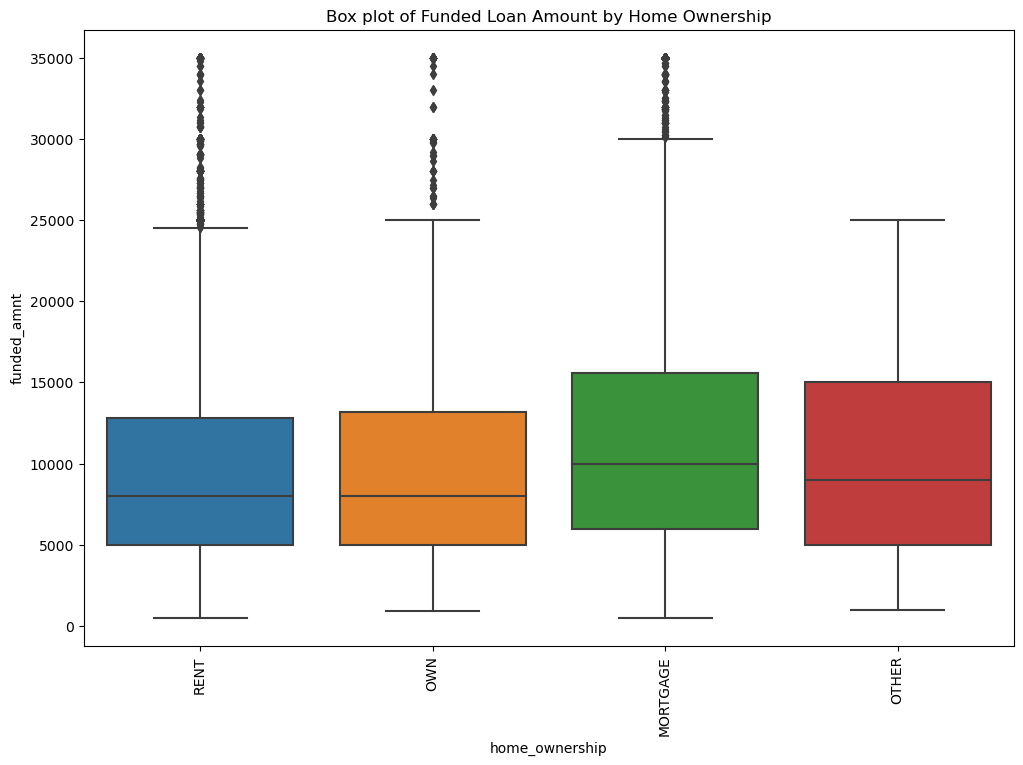

In [161]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='home_ownership', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Home Ownership')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:

The box plot indicates that funded loan amounts are relatively consistent across different home ownership statuses, with only minor variations. Borrowers with a MORTGAGE tend to receive slightly higher loan amounts, while the overall impact of home ownership status on loan amounts is modest. The presence of outliers in all categories suggests that there are exceptional cases in every home ownership status, which may be due to specific borrower profiles or lender discretion.

## (v) BOX PLOT OF FUNDED LOAN AMOUNT BY VERIFICATION STATUS


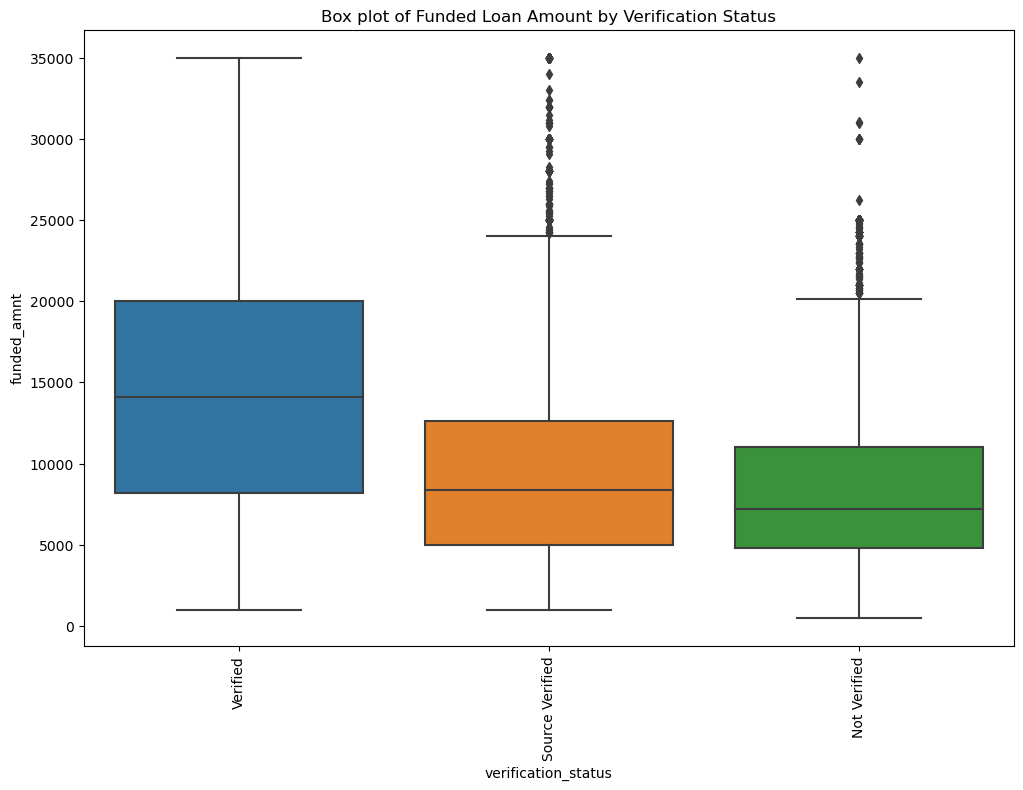

In [162]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='verification_status', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Verification Status')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:

The box plot indicates that funded loan amounts are influenced by the verification status of the borrower's income. Borrowers with verified income tend to receive higher loan amounts, while those with source-verified or not-verified incomes tend to receive lower amounts. The variability in loan amounts is also higher for verified income borrowers, suggesting that lenders are more flexible in lending larger amounts to borrowers with verified incomes. The presence of outliers in all categories suggests that there are exceptional cases in every verification status, which may be due to specific borrower profiles or lender discretion.

## (vi) BOX PLOT OF FUNDED LOAN AMOUNT BY ISSUE YEAR



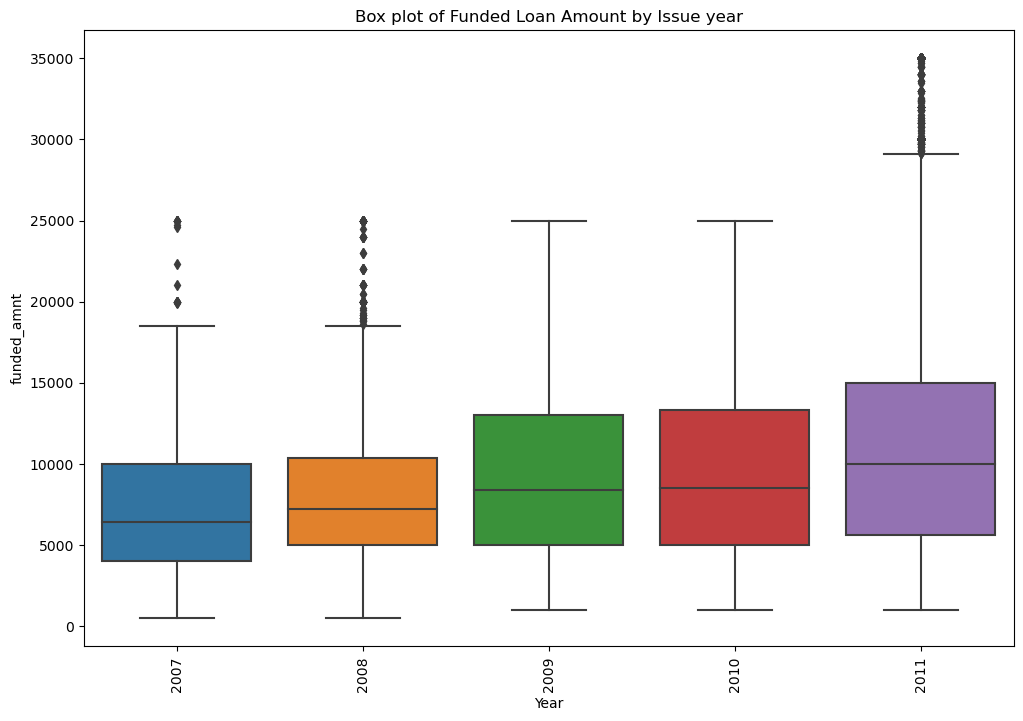

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Issue year')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:

The box plot indicates a clear trend of increasing funded loan amounts over the years from 2007 to 2011. This trend suggests that lenders were approving larger loans over time, and the variability in loan amounts also increased, especially in 2011. The presence of more frequent and higher outliers in 2011 indicates a significant shift in lending practices or borrower behavior during that year. This analysis highlights the evolving nature of loan amounts and lending practices over the specified period.

## (vii) BOX PLOT OF FUNDED LOAN AMOUNT BY LOAN STATUS



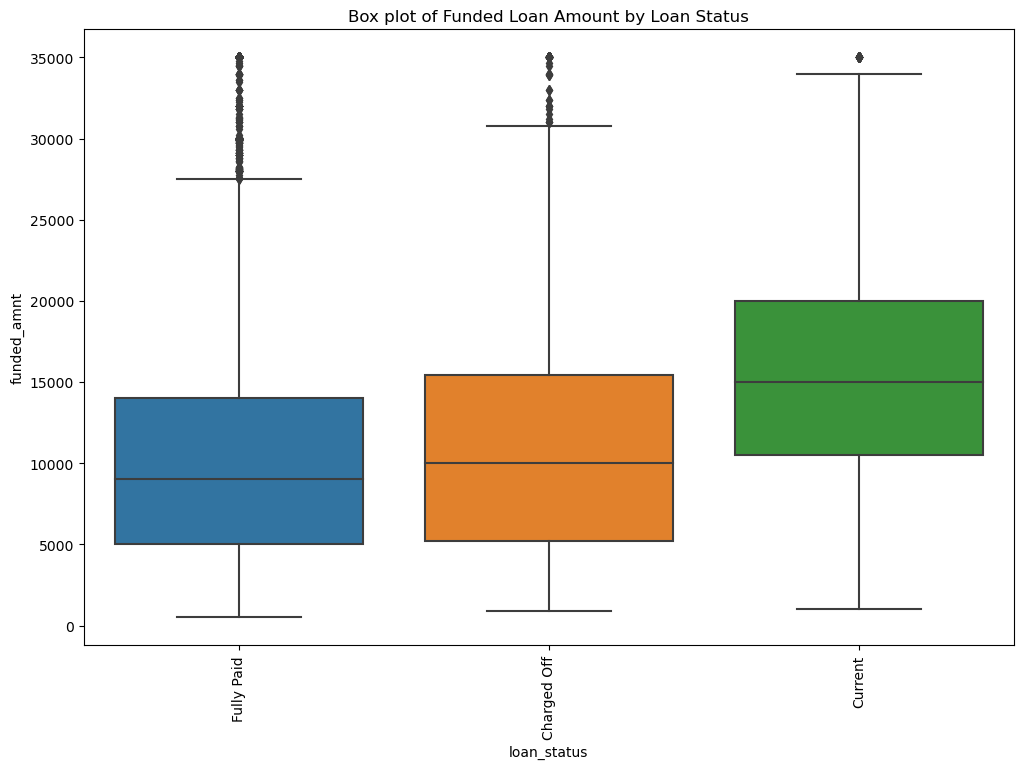

In [164]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='funded_amnt', data=df3)
plt.title('Box plot of Funded Loan Amount by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot indicates that "Charged Off" loans received more loan amounts compared to "Fully Paid" Loans and the variability in loan amounts  is also more in "Charged Off" loans as compared to "Fully Paid" Loans. The presence of more frequent and higher outliers in "Fully Paid" Loans indicate a significant shift in lending practices or borrower behavior for "Fully-Paid" Loans. 

## (viii) BOX PLOT OF INTEREST RATE BY LOAN STATUS

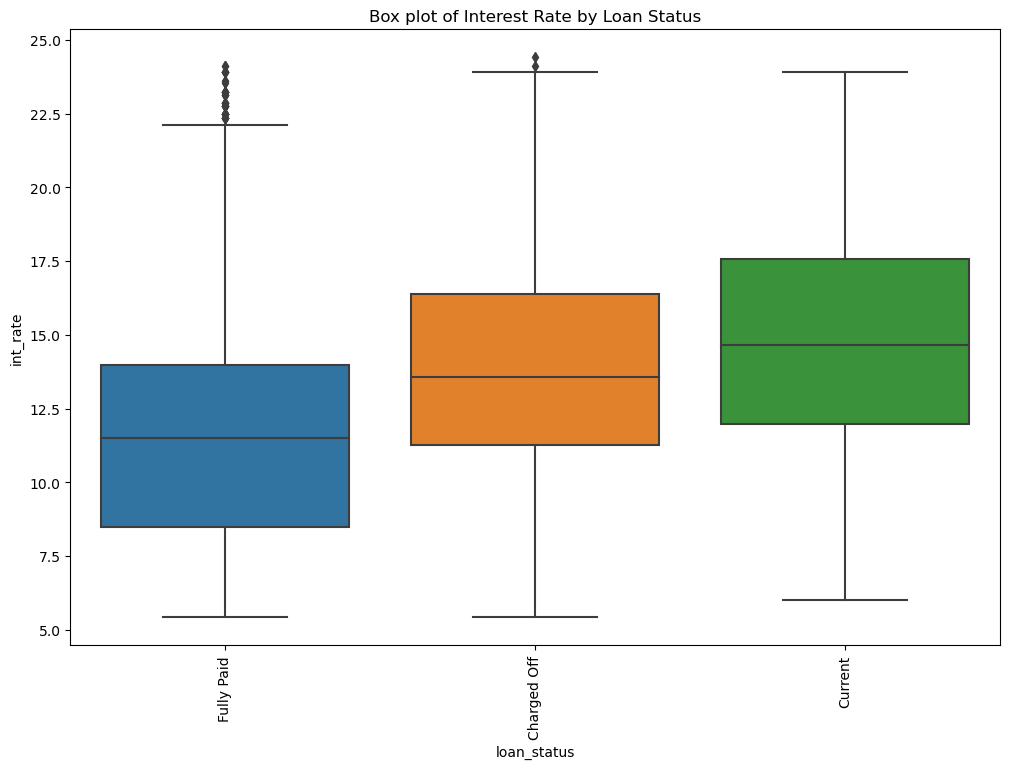

In [165]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='int_rate', data=df3)
plt.title('Box plot of Interest Rate by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot indicates that "Charged Off" loans had higher interest rates compared to "Fully Paid" Loans. The presence of more frequent and higher outliers in "Fully Paid" Loans indicate a significant shift in interest rates for "Fully-Paid" Loans.

## (ix) BOX PLOT OF DEBT-TO-INCOME RATIO BY LOAN STATUS

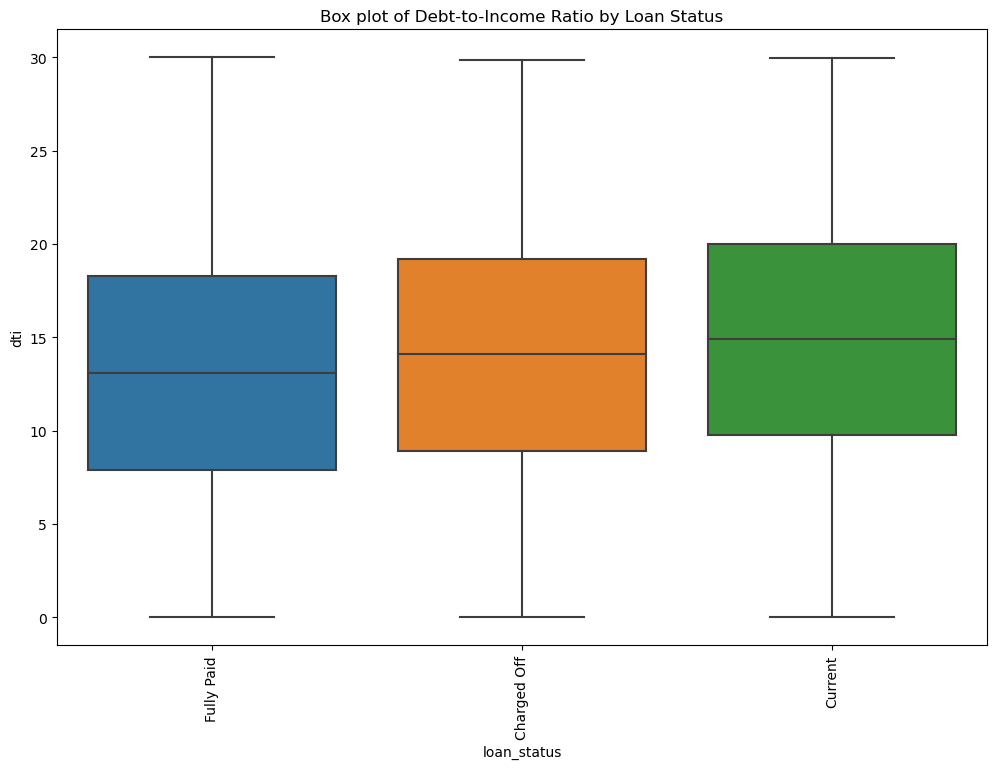

In [166]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='dti', data=df3)
plt.title('Box plot of Debt-to-Income Ratio by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot indicates that "Charged Off" loans had slightly higher Debt-to-Income Ratio compared to "Fully Paid" Loans. 

## (x) BOX PLOT OF THE REVOLVING LINE UTILIZATION RATE BY LOAN STATUS

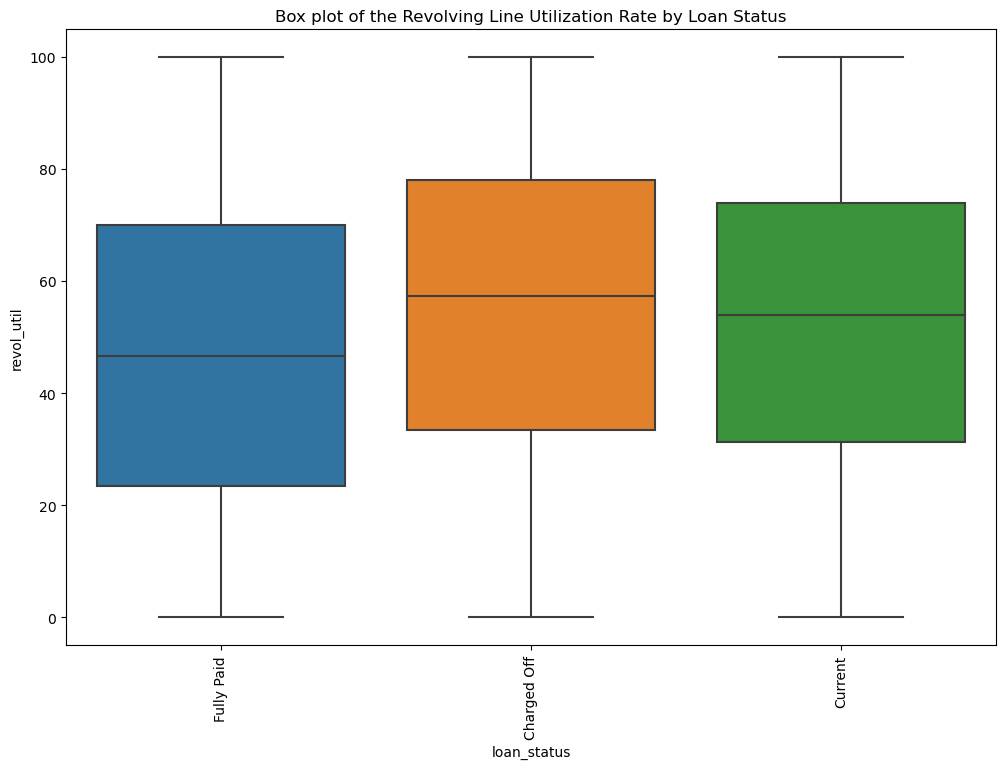

In [167]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='revol_util', data=df3)
plt.title('Box plot of the Revolving Line Utilization Rate by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Inference from the Box Plot:-

The box plot indicates that "Charged Off" loans had higher Revolving Line Utilization Rates compared to "Fully Paid" Loans.

# OVERALL INFERENCE FROM ALL THE BOX PLOTS:-

Clear distinctions in loan amounts, interest rates, and annual incomes across different grades, terms, and loan statuses.

# C. Categorical vs. Categorical Analysis

## (i) SIDE-BY-SIDE BAR PLOT BETWEEN GRADE AND LOAN STATUS

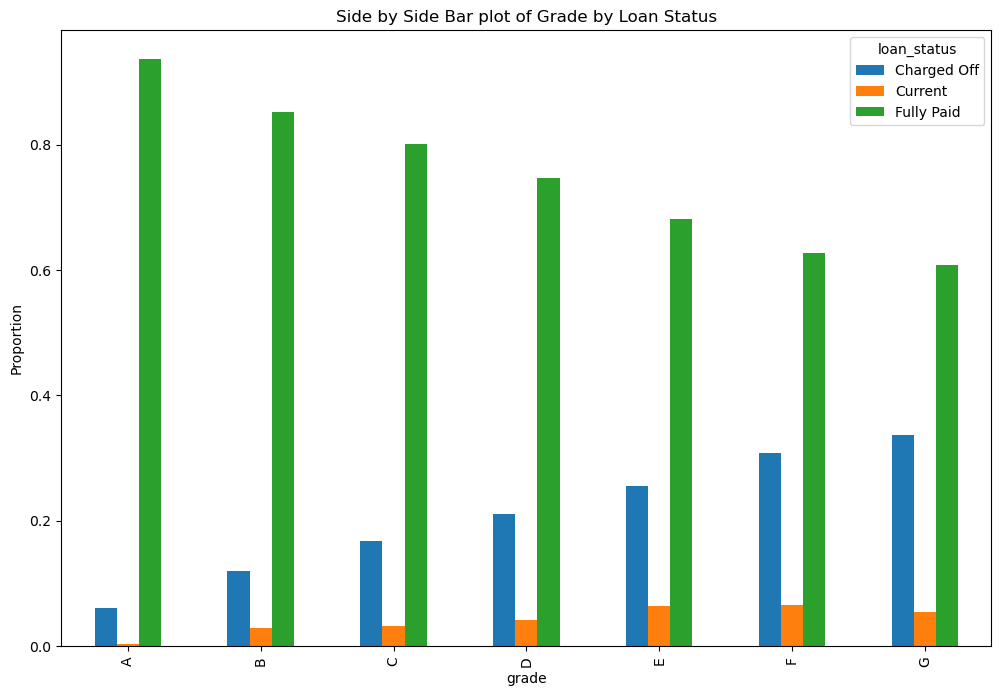

In [168]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['grade'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Grade by Loan Status')
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

 #### Observation: 
 Loans with grades A and B have higher proportions of fully paid statuses compared to lower grades.

####  Insight:
Similar to sub-grades, overall loan grades are predictive of performance, with higher grades indicating lower risk and better outcomes.

## (ii) SIDE-BY-SIDE BAR PLOT BETWEEN SUB-GRADE AND LOAN STATUS

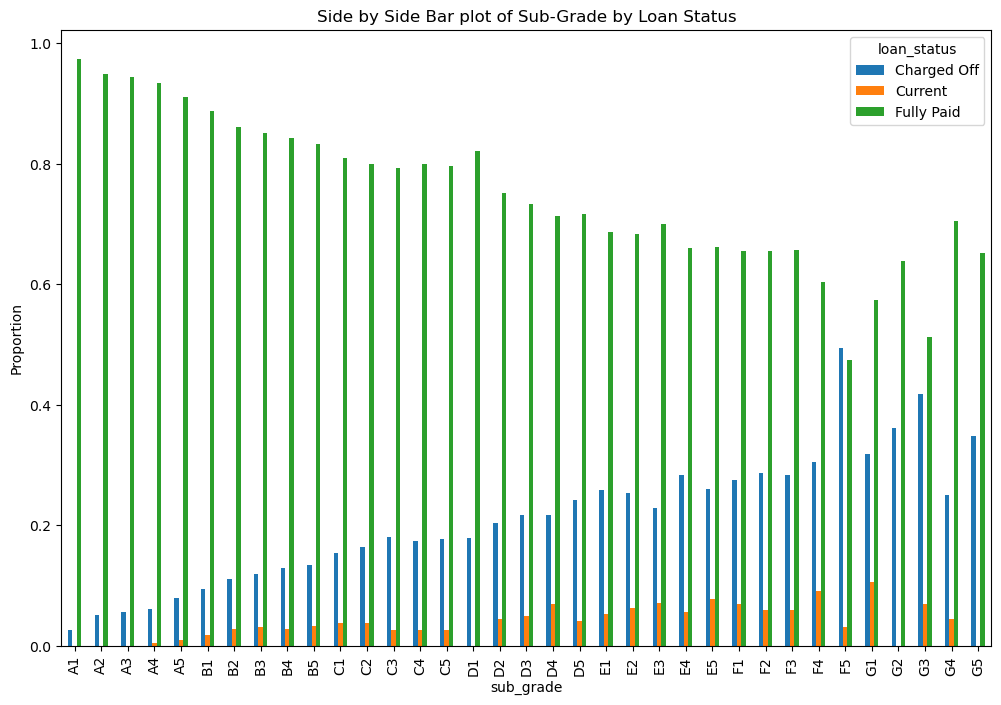

In [169]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['sub_grade'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Sub-Grade by Loan Status')
plt.xlabel('sub_grade')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation:
Lower sub-grades (e.g., G5, F5) have a higher proportion of charged-off loans compared to higher sub-grades (e.g., A1, A2).


#### Insight:
Sub-grade is a strong predictor of loan performance, with higher sub-grades (e.g., A1, A2) correlating with better outcomes than lower sub-grades (e.g., G5, F5)

## (iii) SIDE-BY-SIDE BAR PLOT BETWEEN EMPLOYMENT LENGTH AND LOAN STATUS

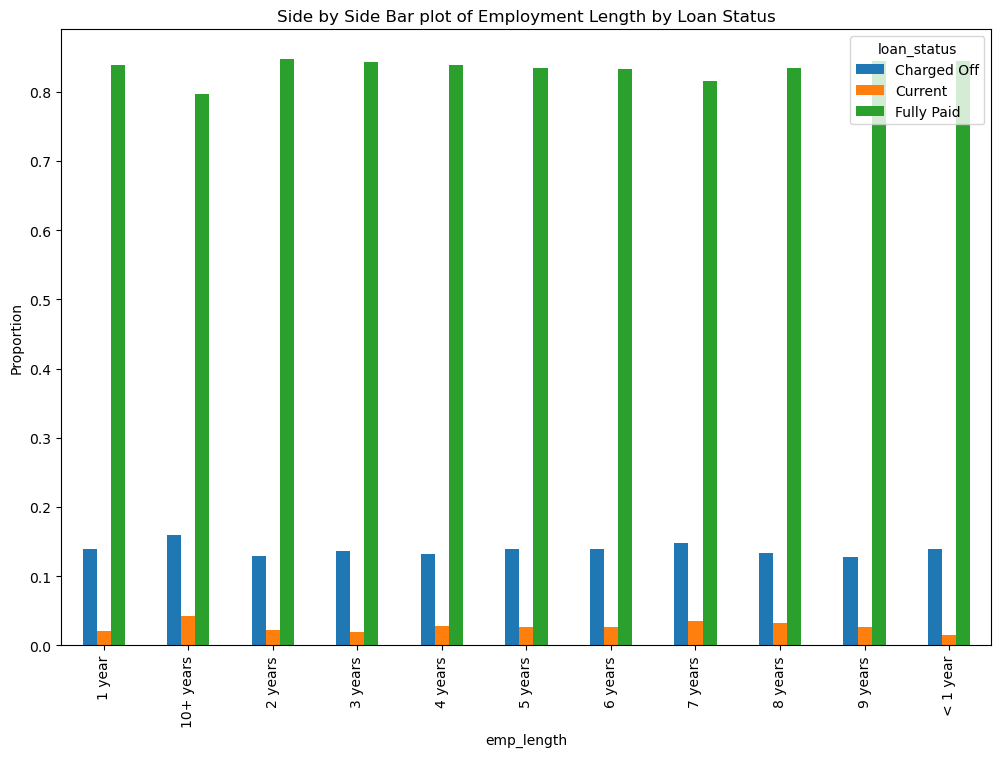

In [170]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['emp_length'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Employment Length by Loan Status')
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation:


most of all the employee lengths values has a charged off to fully paid ratio of ~15-16.

Some values like 10+ years and 7 years shows ratio of 20 and 18 respectively which is not very significantly high.

We can say that borrower with 10+ year of employment have a very slightly higher probability to default.


#### Insight: 
While employment stability generally correlates with better loan performance, those at the extremes of employment length (very new or very long-term) might present higher risks.

## (iv) SIDE-BY-SIDE BAR PLOT BETWEEN HOME OWNERSHIP AND LOAN STATUS

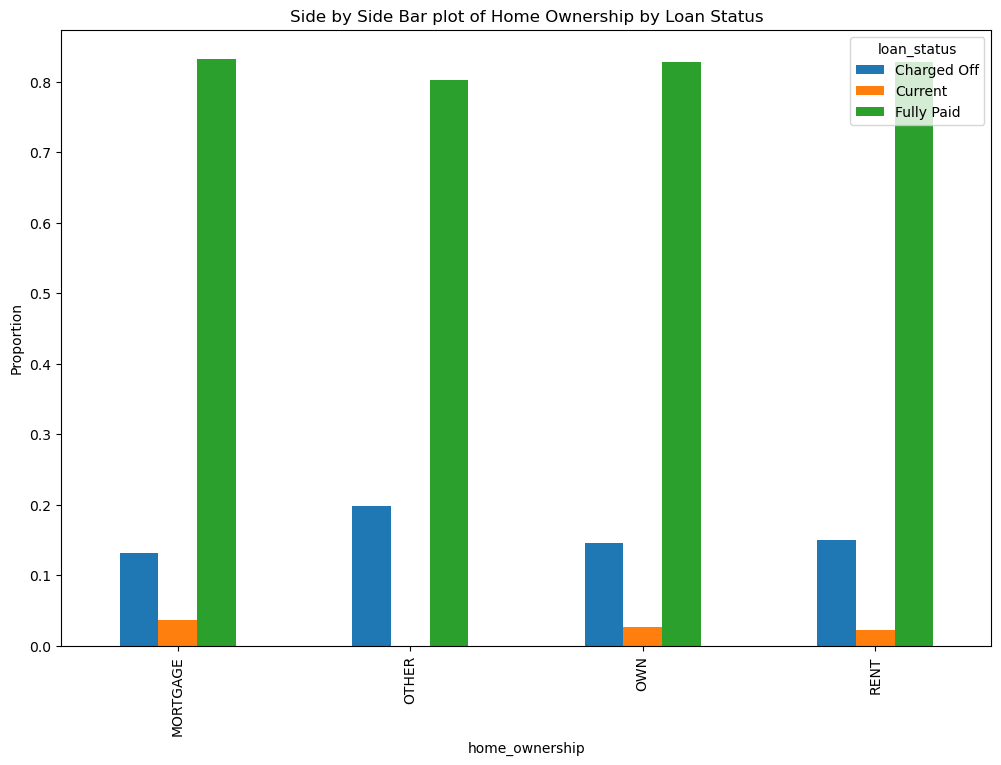

In [171]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['home_ownership'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Home Ownership by Loan Status')
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 
Loans with 'OTHER'  and 'RENT' home ownership status have a higher proportion of charged-off loans than 'MORTGAGE'  and 'OWN' home ownership status.

#### Insight:
Homeownership status impacts loan performance, with those owning homes or having mortgages performing better than others.

## (v) SIDE-BY-SIDE BAR PLOT BETWEEN VERIFICATION STATUS AND LOAN STATUS

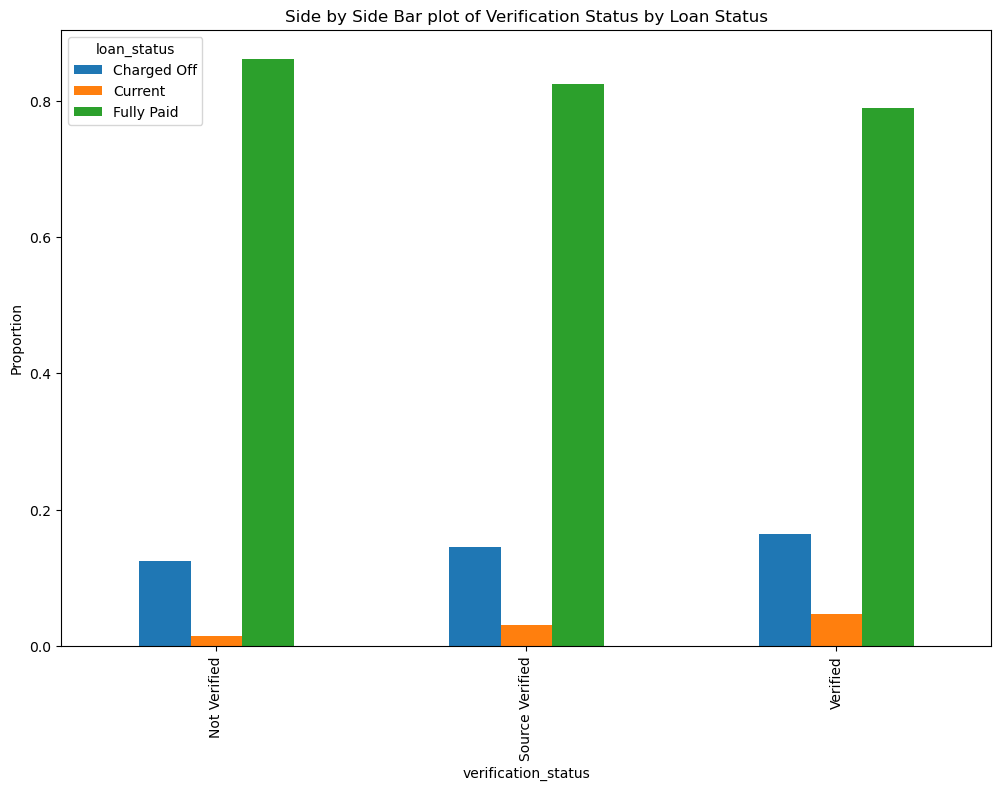

In [172]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['verification_status'], df3['loan_status'])
         
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Verification Status by Loan Status')
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 
Verified loans have a higher proportion of fully paid statuses compared to not verified loans.


#### Insight: 
Verification status is a significant factor in loan performance, with verified loans showing better outcomes.

## (vi) SIDE-BY-SIDE BAR PLOT BETWEEN ISSUE MONTH AND LOAN STATUS

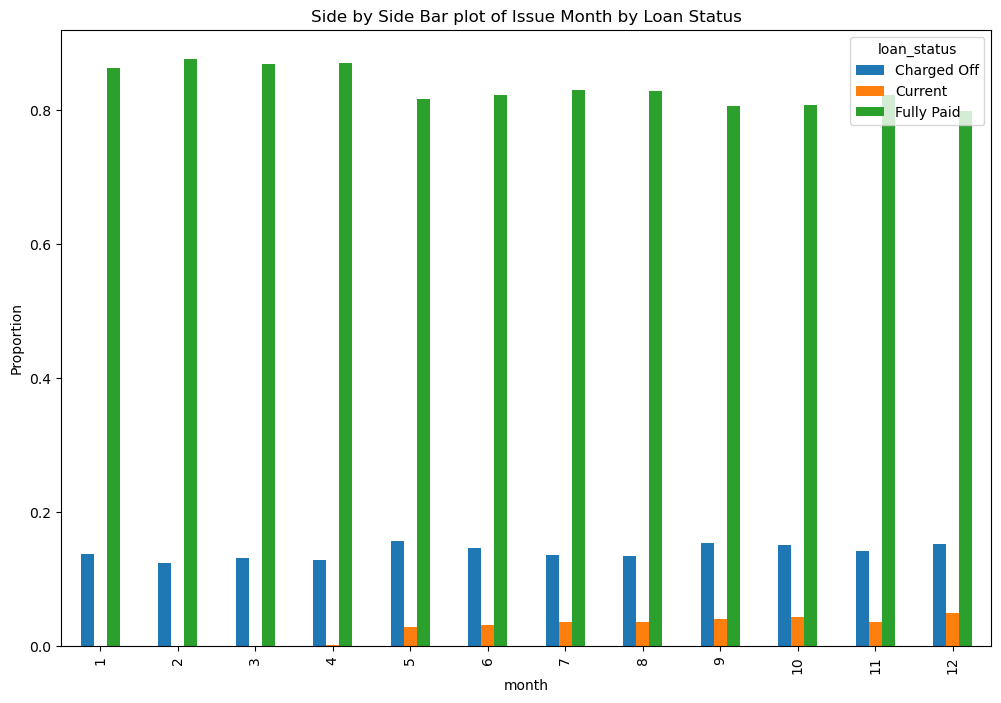

In [173]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['month'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Issue Month by Loan Status')
plt.xlabel('month')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 

The distribution of loan statuses by issue month appears relatively consistent, with a high proportion of fully paid loans.

#### Insight: 
There is no significant monthly trend affecting loan status, suggesting that the time of year when a loan is issued does not substantially impact its performance.

## (vii) SIDE-BY-SIDE BAR PLOT BETWEEN ISSUE YEAR AND LOAN STATUS

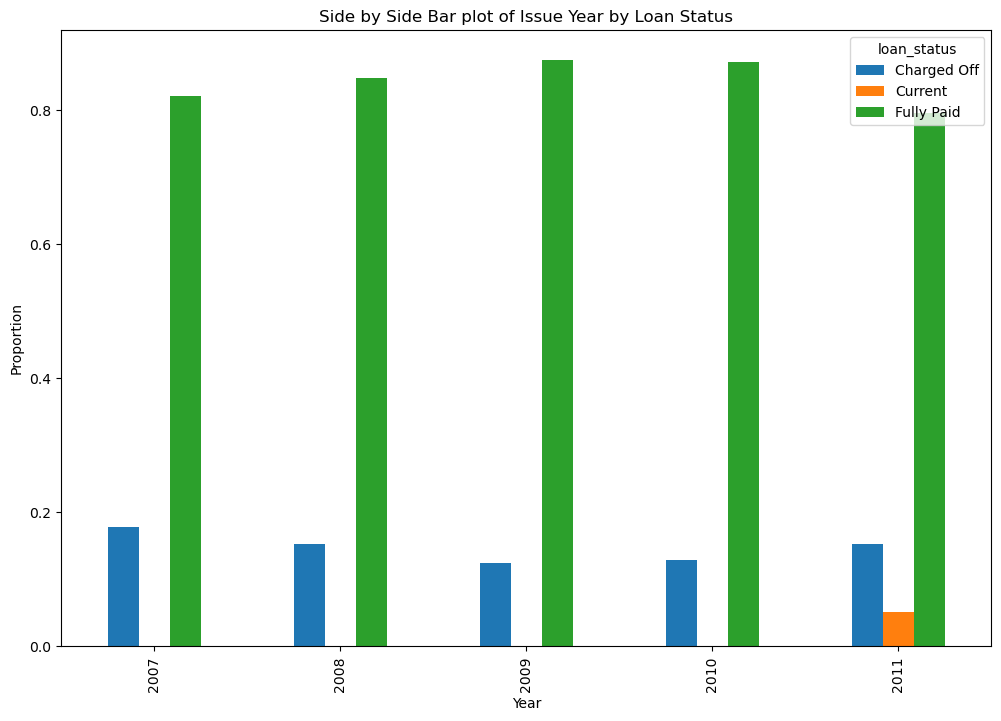

In [174]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['Year'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Issue Year by Loan Status')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 
Loans issued in 2007 and 2011 have a higher proportion of charged-off loans compared to other years.


#### Insight: 

This could reflect broader economic conditions during those years, such as the financial crisis around 2007-2008 and its lingering effects.

## (viii) SIDE-BY-SIDE BAR PLOT BETWEEN PURPOSE AND LOAN STATUS

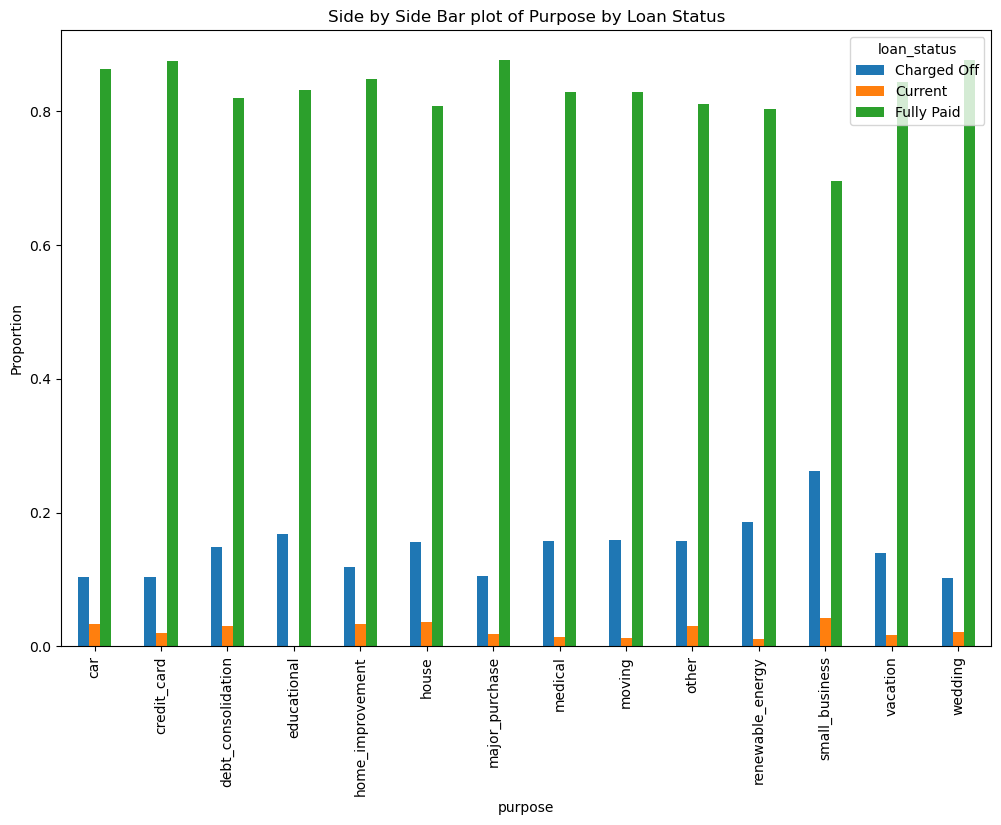

In [175]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['purpose'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Purpose by Loan Status')
plt.xlabel('purpose')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 
Loans for renewable energy and small business purposes have a relatively higher proportion of charged-off status.


#### Insight: 
These categories might be higher risk compared to others like car or credit card loans, which have a higher proportion of fully paid statuses.

## (ix) SIDE-BY-SIDE BAR PLOT BETWEEN ADDRESS-STATE AND LOAN STATUS

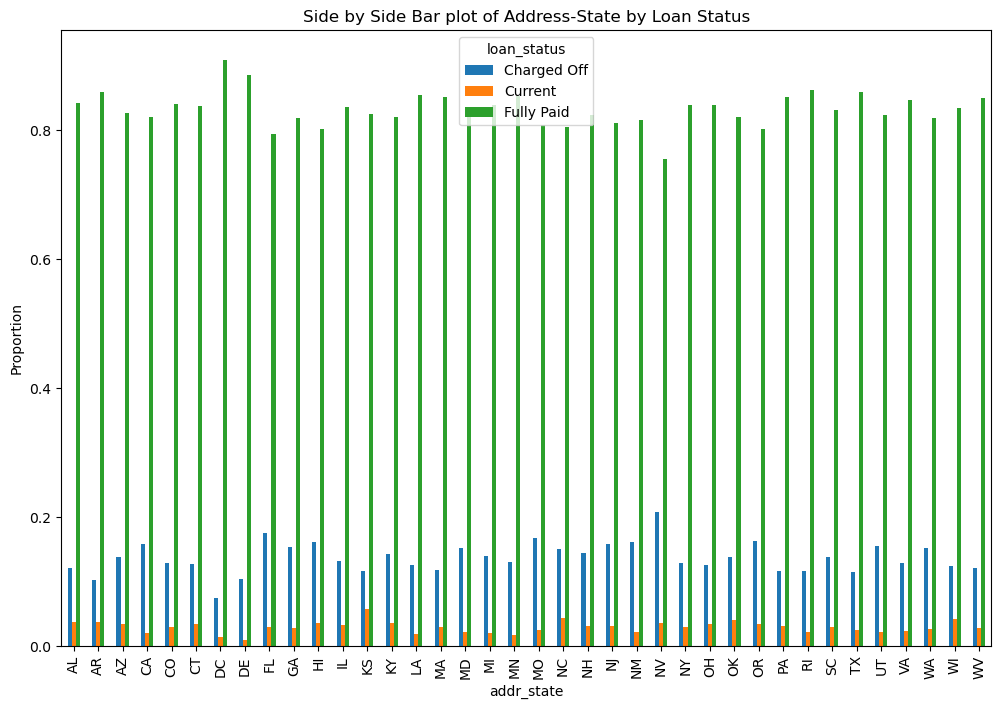

In [176]:
# Create cross-tabulation with loan_status included
crosstab = pd.crosstab(df3['addr_state'], df3['loan_status'])
            
# Normalize to make the plot more readable
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
            
# Plotting
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Side by Side Bar plot of Address-State by Loan Status')
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

#### Observation: 
The majority of loans in each state are fully paid.


#### Insight: 
States like NV and FL have a higher proportion of charged-off loans compared to others, indicating potential economic stress or higher risk in these states.

## (x) SIDE-BY-SIDE BAR PLOT BETWEEN TERM PERIOD AND LOAN STATUS

Text(0, 0.5, 'Proportion')

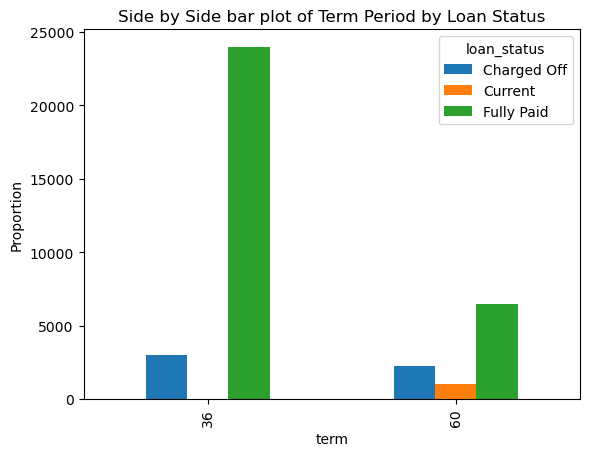

In [185]:
pd.crosstab(df3['term'], df3['loan_status']).plot.bar()
plt.title('Side by Side bar plot of Term Period by Loan Status')
plt.ylabel('Proportion')

# INFERENCE:-

We can see that for term period of 36 months charged off to fully paid ratio is 1/10 but in case of 60 months ratio is 1/3.

This indicates that customers with term of 60 months are very likely to default.


## (xi) SIDE-BY-SIDE BAR PLOT BETWEEN DELINQUENCY AND LOAN STATUS

Text(0, 0.5, 'Proportion')

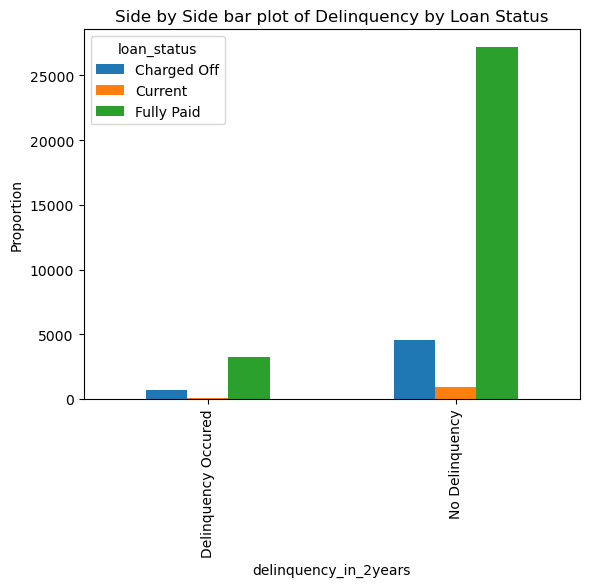

In [189]:
pd.crosstab(df3['delinquency_in_2years'], df3['loan_status']).plot.bar()
plt.title('Side by Side bar plot of Delinquency by Loan Status')
plt.ylabel('Proportion')

# INFERENCE:-

People with past Delinquency has charged off to fully paid ratio of 20% which is higher than that of non delinquent borrowers with very small margin which cannot determine much due to difference in size of deliquency and non deliquency values.

## (xii) SIDE-BY-SIDE BAR PLOT BETWEEN BANKRUPTCIES OCCURED AND LOAN STATUS

Text(0, 0.5, 'Proportion')

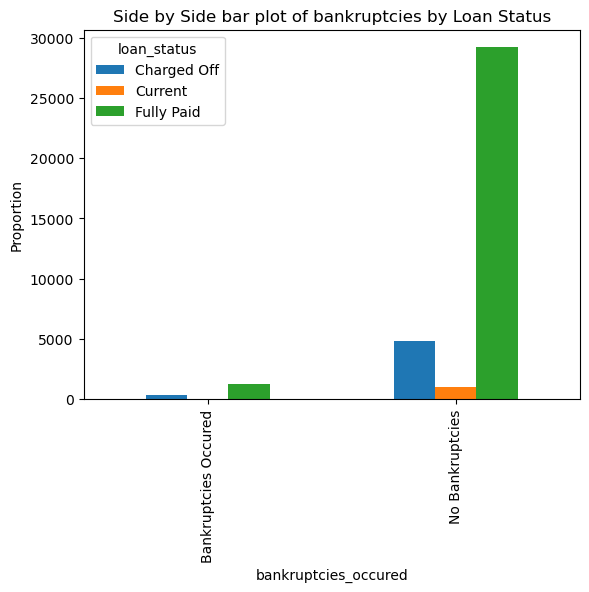

In [192]:
pd.crosstab(df3['bankruptcies_occured'], df3['loan_status']).plot.bar()
plt.title('Side by Side bar plot of bankruptcies by Loan Status')
plt.ylabel('Proportion')

# INFERENCE:-

People with earlier Bankruptcies records are more like to be charged off that non bankrupt borrowers with a small margin which is not very significant.

In [173]:
## Creating new columns by Dividing funded amount invested and Annual Income into buckets for further analysis.
df3["funded_amnt_inv_buc"] = pd.qcut(df3.funded_amnt_inv,5,["0-700","700-1400","1400-2100","2100-2800","2800-3500"])
df3["annual_inc_buc"] = pd.qcut(df3.annual_inc,5,["4k-43k","43k-82k","82k-121k","121k-160k","160k-199k"])

## (xiii) SIDE-BY-SIDE BAR PLOT BETWEEN FUNDED AMOUNT COMMITED BY INVESTORS BUCKETS AND LOAN STATUS

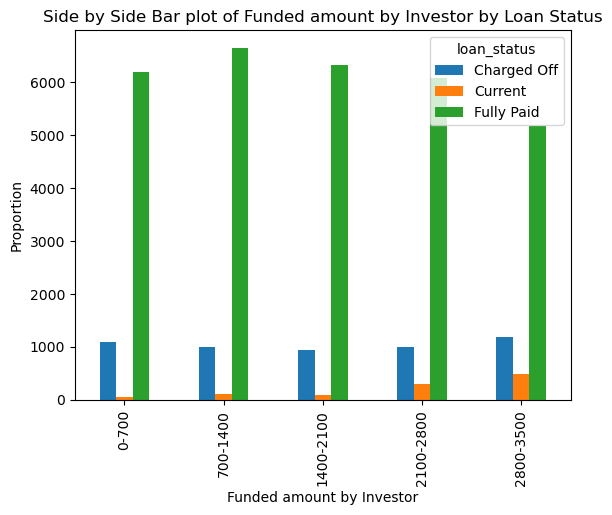

In [176]:
crosstab = pd.crosstab(df3['funded_amnt_inv_buc'], df3['loan_status']).plot.bar()
plt.title('Side by Side Bar plot of Funded amount by Investor by Loan Status')
plt.xlabel('Funded amount by Investor')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

Borrowers with Funded amount invested 2800-3500 are most likely to default having charged off to fully paid ratio of 22%.

Other buckets have a ratio between 14-17% where 700-1400 are having least probability to default of all by a small margin.

## (xiv) SIDE-BY-SIDE BAR PLOT BETWEEN Annual Income Buckets AND LOAN STATUS

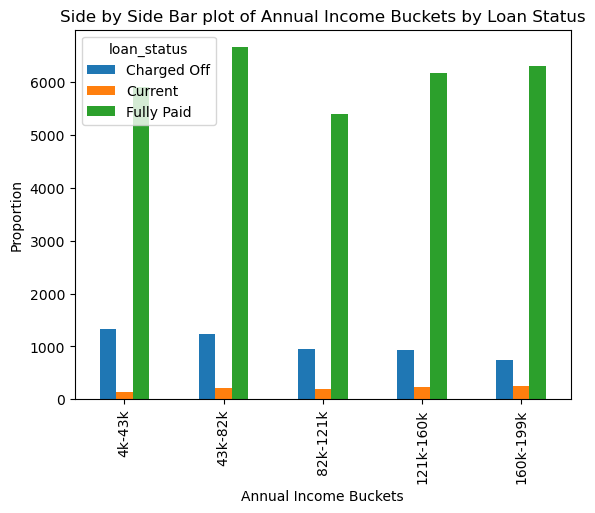

In [177]:
crosstab = pd.crosstab(df3['annual_inc_buc'], df3['loan_status']).plot.bar()
plt.title('Side by Side Bar plot of Annual Income Buckets by Loan Status')
plt.xlabel('Annual Income Buckets')
plt.ylabel('Proportion')
plt.legend(title='loan_status')
plt.xticks(rotation=90)
plt.show()

# INFERENCE:-

As the annual income increases chances of defaulting decreases

Income range 4k to 43k has a charged off/ fully paid ratio of 22% where as for income 160k to 199k the ratio is 11%.

# INFERENCES DRAWN FROM  BI-VARITE ANALYSIS:


#### Scatter Plots and Correlation matrix: 

1) Loan Amount, Funded Amount, Funded Amount Inv and Installment: Strong positive correlations between loan_amnt, funded_amnt, funded_amnt_inv and installment.

2) Term and Interest Rate: The correlation between term and interest rate is slightly higher in charged-off (0.46) compared to fully paid loans (0.41), suggesting that longer terms might be slightly more associated with higher interest rates in charged-off loans.

3) Revolving Balance and Utilization: The correlation is stronger in fully paid loans (0.44) than in charged-off loans (0.41), indicating that higher revolving balances are more critical in fully paid loans.

4) Annual Income: The moderate correlation between annual income and loan amount is stronger in charged-off loans (0.46) compared to fully paid loans (0.41), suggesting that higher income borrowers tend to take larger loans and are more likely to not repay them.

#### Box plots: Clear distinctions in loan amounts, interest rates, and annual incomes across different grades, terms, and loan statuses:

1) Lower credit grades (E, F, G) are associated with larger Funded Loan Amounts, which could indicate higher risk as these grades are generally assigned to borrowers perceived to have higher credit risk.

2)  Lower sub-grades (E, F, G) are associated with higher and more variable loan amounts, suggesting a higher risk profile and possibly more aggressive lending strategies in these categories. Higher sub-grades (A, B) are associated with lower and more consistent loan amounts, indicating a more conservative approach to lending for borrowers with higher creditworthiness.

3) While borrowers with longer employment lengths (such as "10+ years") tend to receive slightly higher loan amounts, the overall impact of employment length on loan amounts is modest.

4) Borrowers with a MORTGAGE tend to receive slightly higher loan amounts, while the overall impact of home ownership status on loan amounts is modest. 

5) Borrowers with verified income tend to receive higher loan amounts, while those with source-verified or not-verified incomes tend to receive lower amounts. The variability in loan amounts is also higher for verified income borrowers, suggesting that lenders are more flexible in lending larger amounts to borrowers with verified incomes. 

6) There is a clear trend of increasing funded loan amounts over the years from 2007 to 2011. This trend suggests that lenders were approving larger loans over time, and the variability in loan amounts also increased, especially in 2011. The presence of more frequent and higher outliers in 2011 indicates a significant shift in lending practices or borrower behavior during that year.

7)  "Charged Off" loans received more loan amounts compared to "Fully Paid" Loans and the variability in loan amounts is also more in "Charged Off" loans as compared to "Fully Paid" Loans. The presence of more frequent and higher outliers in "Fully Paid" Loans indicate a significant shift in lending practices or borrower behavior for "Fully-Paid" Loans.

8)  "Charged Off" loans had higher interest rates compared to "Fully Paid" Loans.
 
9)  "Charged Off" loans had slightly higher Debt-to-Income Ratio compared to "Fully Paid" Loans.

10)  "Charged Off" loans had higher Revolving Line Utilization Rates compared to "Fully Paid" Loans.

#### Side-By-Side Bar Plots:

2) Overall loan grades are predictive of performance, with higher grades indicating lower risk and better outcomes.

3) Sub-grade is a strong predictor of loan performance, with higher sub-grades (e.g., A1, A2) correlating with better outcomes than lower sub-grades (e.g., G5, F5)

4) While employment stability generally correlates with better loan performance, those at the extremes of employment length (Very new like 1 year or very long-term like 10+ years) might present higher risks.

5) Homeownership status impacts loan performance, with those owning homes or having mortgages performing better than others.

6) Verification status is a significant factor in loan performance, with verified loans showing better outcomes.

7) Loans issued in 2007 and 2011 have a higher proportion of charged-off loans compared to other years. This could reflect broader economic conditions during those years, such as the financial crisis around 2007-2008 and its lingering effects.

8) Loans for renewable energy and small business purposes have a relatively higher proportion of charged-off status compared to others like car or credit card loans, which have a higher proportion of fully paid statuses.

9) States like NV and FL have a higher proportion of charged-off loans compared to others, indicating potential economic stress or higher risk in these states.

10) Loan amounts between 2800 to 3500 are most risky of all, leads to maximum percentage of charged off.

11) Income acts as a very important variable in terms of determining defaulters, Higher the income lower the risk of charged off. Income between 4K to 43K have a very high risk in granting loan where as 160k to 199k are much more safer.

12) Term period of 60 have very high defaulters compared to 36, 36 months charged off to fully paid ratio is 1/10 but in case of 60 months ratio is 1/3.


# THANK YOU! 